In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
micro_census=pd.read_excel('/Users/jacklobe/lighthouse/Final/CensusData_MicrotransitDemandParameters_CBG_2016.xlsx')
para_census=pd.read_excel('/Users/jacklobe/lighthouse/Final/CensusData_ParatransitDemandParameters_CBG_2016.xlsx')

In [3]:
import pandas as pd
from functools import reduce


In [3]:
import geopandas as gpd

In [138]:
dart=pd.read_csv('small_dart_sample.csv')
big=pd.read_csv('DART_Jan2019_Sep2020.csv')
swtran=pd.read_csv('small_swtran.csv')
sw_big=pd.read_csv('SouthwestTransit_Aug2019_Sep2020.csv')
StarTran=pd.read_csv('small_StarTran_sample.csv')
star_big=pd.read_csv('StarTran_Apr2020_Sep2020.csv')

In [6]:
df=pd.read_csv('dallas_racial.csv')

In [139]:
def convertcentral(data):
    #converts central timezones to pandas datetime and converts it to central time
    data['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    data['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    return data
metrics=['processing','accepted','arriving','inProgress','completed','cancelled','noDriversAvailable','serviceDisruption']

In [140]:
import ast
from pandas import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [ ]:
import time
import requests as re
def CBG(row):
    #get FIPS codes for each lat long within the data table 
    time.sleep(3)
    response=re.get(f'https://geo.fcc.gov/api/census/block/find?latitude={row["requestedPickupLatitude"]}&longitude={row["requestedPickupLongitude"]}&format=json').json()
    try:
        return response['Block']['FIPS']
    except:
        return 'error'

In [142]:
# #dart doesnt really make sense now that you have them all in a csv tho this is for tracking
dart.drop(dart.columns[dart.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
# highAA=dart.sort_values(by='ProportionNonWhite',ascending=False)
# a=big.loc[big.serviceId=='bc5bd214-d4ca-41fb-a6ef-9c5c412e7206']
# b=big.loc[big.serviceId=='b8d30486-7b9f-4b02-a080-4f3db94d27e4']
# misisng=pd.concat([a, b], ignore_index=True)
# misisng['CBG']=misisng.apply(lambda row:CBG(row),axis=1)
# misisng['CBG'] = misisng['CBG'].astype(str).str[:12]
# misisng.CBG=misisng.CBG.astype(int)
# misisng=misisng.merge(micro_census,left_on='CBG', right_on='CBG')
# final=pd.concat([highAA, misisng], ignore_index=True)
# race=final.groupby(final.serviceId)[['ProportionNonWhite']].mean()
# race=race.reset_index(drop=False)
# df=big.merge(race,left_on='serviceId', right_on='serviceId')
# df=df[['requestedPickupLatitude','requestedPickupLongitude','ProportionNonWhite']]

In [143]:
dart

requestedPickupTs         requestedDropoffTs  \
0    2020-04-23 07:05:00-05:00  2020-04-23 07:14:59-05:00   
1    2019-06-04 09:07:25-05:00  2019-06-04 09:16:26-05:00   
2    2020-06-09 15:11:20-05:00  2020-06-09 15:17:25-05:00   
3    2020-08-17 16:19:51-05:00  2020-08-17 16:26:44-05:00   
4    2019-03-01 15:54:08-06:00  2019-03-01 16:03:52-06:00   
..                         ...                        ...   
995  2019-05-08 13:00:00-05:00  2019-05-08 13:04:21-05:00   
996  2019-10-28 07:00:00-05:00  2019-10-28 07:06:38-05:00   
997  2019-04-23 16:49:00-05:00  2019-04-23 16:57:16-05:00   
998  2019-05-23 15:45:00-05:00  2019-05-23 15:51:29-05:00   
999  2019-11-21 11:43:06-06:00  2019-11-21 11:46:01-06:00   

    requestedPickupTsTimestamp requestedDropoffTsTimestamp  \
0    2020-04-23T05:05:00-07:00   2020-04-23T05:14:59-07:00   
1    2019-06-04T07:07:25-07:00   2019-06-04T07:16:26-07:00   
2    2020-06-09T13:11:20-07:00   2020-06-09T13:17:25-07:00   
3    2020-08-17T14:19:51-07:00   2020-08-17T14:26:44-07:00   
4    2019-03-01T13:54:08-08:00   2019-03-01T14:03:52-08:00   
..                         ...                         ...   
995  2019-05-08T11:00:00-07:00   2019-05-08T11:04:21-07:00   
996  2019-10-28T05:00:00-07:00   2019-10-28T05:06:38-07:00   
997  2019-04-23T14:49:00-07:00   2019-04-23T14:57:16-07:00   
998  2019-05-23T13:45:00-07:00   2019-05-23T13:51:29-07:00   
999  2019-11-21T09:43:06-08:00   2019-11-21T09:46:01-08:00   

     requestedPickupLatitude  requestedPickupLongitude  \
0                  32.718280                -96.684454   
1                  32.718280                -96.684454   
2                  32.718839                -96.685348   
3                  32.719552                -96.686474   
4                  32.718280                -96.684454   
..                       ...                       ...   
995                33.036722                -96.707762   
996                33.046895                -96.722027   
997                32.922235                -96.785340   
998                32.878252                -96.569039   
999                32.948502                -96.863350   

     requestedDropoffLatitude  requestedDropoffLongitude  \
0                   32.677249                 -96.590377   
1                   32.671656                 -96.664271   
2                   32.699806                 -96.659907   
3                   32.696627                 -96.638655   
4                   32.696054                 -96.577986   
..                        ...                        ...   
995                 33.033556                 -96.701109   
996                 33.033556                 -96.701109   
997                 32.883305                 -96.764925   
998                 32.904062                 -96.564146   
999                 32.953085                 -96.854820   

                                serviceId     status  ...  \
0    4ee9b67e-98c2-4191-a4f7-efa0b32f48c1  completed  ...   
1    d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed  ...   
2    d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed  ...   
3    d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed  ...   
4    4ee9b67e-98c2-4191-a4f7-efa0b32f48c1  completed  ...   
..                                    ...        ...  ...   
995  e40490b6-1d87-4dec-8b23-92632915008e  completed  ...   
996  e40490b6-1d87-4dec-8b23-92632915008e  completed  ...   
997  671bf16c-0ff1-4841-9795-1644d57bd56c  cancelled  ...   
998  d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed  ...   
999  907a17e6-9da5-4c47-9044-24b7a7c00b4d  completed  ...   

     Ged Or Alternative Credential  ProportionHighSchoolEducatedOrLess  \
0                               48                           85.204082   
1                               48                           85.204082   
2                               48                           85.204082   
3                               48                           85.204082   
4             

In [9]:
# #swtran doesnt really make sense now that you have them all in a csv tho this is for tracking
# a=big.loc[big.serviceId=='e408dae9-2873-456b-914e-06e799af5881']
# b=sw_big.loc[sw_big.serviceId=='779aa6c2-27c5-4643-978a-49e3d1bbb176']
# sw_missing=pd.concat([a, b], ignore_index=True)
# sw_missing['CBG']=sw_missing.apply(lambda row:CBG(row),axis=1)
# sw_missing['CBG'] = sw_missing['CBG'].astype(str).str[:12]
# sw_missing.CBG=sw_missing.CBG.astype(int)
# sw_missing=sw_missing.merge(micro_census,left_on='CBG', right_on='CBG')
# final_swtran=pd.concat([sw_missing, swtran], ignore_index=True)

In [17]:
micro_census.loc[micro_census.CBG.astype(str).str[:2]=='48']

CBG  WhitePop  TotalPop  NonWhitePop  ProportionNonWhite  \
183110  480019501001       818      1037          219           21.118611   
183111  480019501002      1866      2019          153            7.578009   
183112  480019501003      1493      1636          143            8.740831   
183113  480019504011      2951      5040         2089           41.448413   
183114  480019504021      3932      7193         3261           45.335743   
...              ...       ...       ...          ...                 ...   
198916  485079503021      1591      1813          222           12.244898   
198917  485079503022      1042      1126           84            7.460036   
198918  485079503023      1055      1459          404           27.690199   
198919  485079503024       726       753           27            3.585657   
198920  485079503025      1610      1610            0            0.000000   

        TotalPopAged25+   6Th Grade   7Th Grade   8Th Grade   9Th Grade  ...  \
183110              714           0          10          14          11  ...   
183111             1407          18          17          34           0  ...   
183112             1166          41           0          17          11  ...   
183113             4260          23          29          54         223  ...   
183114             6826         116         180         282         472  ...   
...                 ...         ...         ...         ...         ...  ...   
198916             1160          20           0          20          65  ...   
198917              663           0           0           0          46  ...   
198918              816          26           0          15          25  ...   
198919              640           0           0           8           3  ...   
198920              765          38          24         106          27  ...   

         Ged Or Alternative Credential  ProportionHighSchoolEducatedOrLess  \
183110                              32                           45.098039   
183111                              32                           34.186212   
183112                              52                           35.162950   
183113                             951                           62.887324   
183114                            1539                           62.452388   
...                                ...                                 ...   
198916                             225                           66.982759   
198917                              35                           49.321267   
198918                              48                           63.235294   
198919                              55                           34.062500   
198920                              32                           60.915033   

        Median household income  Total Occupied Units  \
183110                  43229.0                   409   
183111                  51354.0                   674   
183112                  53657.0                   684   
183113                  43529.0                   106   
183114                  83073.0                    79   
...                         ...                   ...   
198916                      NaN                   542   
198917                  64948.0                   371   
198918                  27050.0                   413   
198919                  48889.0                   244   
198920                  13281.0                   455   

        Total Occupied Owner Units With Zero Vehicles  \
183110                                             11   
183111                                              6   
183112                                             31   
183113                                              0   
183114                                              0   
...                                               ...   
198916                                              0   
198917                                             20

In [18]:
micro_census.columns

Index(['CBG', 'WhitePop', 'TotalPop', 'NonWhitePop', 'ProportionNonWhite',
       'TotalPopAged25+', ' 6Th Grade', ' 7Th Grade', ' 8Th Grade',
       ' 9Th Grade', ' 10Th Grade', ' 11Th Grade', ' 12Th Grade, No Diploma',
       ' Regular High School Diploma', ' Ged Or Alternative Credential',
       'ProportionHighSchoolEducatedOrLess', 'Median household income',
       'Total Occupied Units', 'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
       'ProportionOfZeroCarHouseholds', 'TotalPopWhoseIncomeWasAssessed',
       'PopBelowPovertyLevel', 'ProportionBelowPovertyLevel'],
      dtype='object')

In [9]:
gdf_dart=gpd.GeoDataFrame(big, geometry=gpd.points_from_xy(big.requestedPickupLongitude,big.requestedPickupLatitude))

In [10]:
geojson_file="Census_Block_Group_2010_TX.geojson"
census=gpd.read_file(geojson_file)

In [13]:
sjoined_listings.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'statusChanges',
       'travelDistance', 'travelDuration', 'endpoint', 'geometry',
       'index_right', 'OBJECTID_1', 'OBJECTID', 'STATE_FIPS', 'CNTY_FIPS',
       'STCOFIPS', 'TRACT', 'BLKGRP', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ'

In [12]:
sjoined_listings = gpd.sjoin(gdf_dart, census, op='within')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [15]:
#df=sjoined_listings[['requestedPickupLatitude','requestedPickupLongitude','requestedDropoffLatitude','requestedDropoffLongitude','serviceId','endpoint','statusChanges','travelDistance','travelDuration','FIPS','POPULATION','POP_SQMI','WHITE','BLACK','ASIAN','HISPANIC','MALES','FEMALES']]
import copy
df=copy.copy(sjoined_listings)
B=json_normalize(sjoined_listings['statusChanges'].apply(list_of_dicts).tolist())
df=df.join(B)


In [16]:
df

requestedPickupTs  requestedDropoffTs requestedPickupTsTimestamp  \
0              1587490459          1587491230  2020-04-21T10:34:19-07:00   
44             1569243600          1569243931  2019-09-23T06:00:00-07:00   
52             1565127000          1565127775  2019-08-06T14:30:00-07:00   
59             1554290897          1554291468  2019-04-03T04:28:17-07:00   
65             1554292571          1554293224  2019-04-03T04:56:11-07:00   
...                   ...                 ...                        ...   
237278         1563970431          1563970725  2019-07-24T05:13:51-07:00   
184398         1555005132          1555005783  2019-04-11T10:52:12-07:00   
193418         1548215760          1548217336  2019-01-22T19:56:00-08:00   
241270         1557254580          1557255614  2019-05-07T11:43:00-07:00   
262563         1574706418          1574706856  2019-11-25T10:26:58-08:00   

       requestedDropoffTsTimestamp  requestedPickupLatitude  \
0        2020-04-21T10:47:10-07:00                32.931741   
44       2019-09-23T06:05:31-07:00                32.934094   
52       2019-08-06T14:42:55-07:00                32.936103   
59       2019-04-03T04:37:48-07:00                32.930262   
65       2019-04-03T05:07:04-07:00                32.945021   
...                            ...                      ...   
237278   2019-07-24T05:18:45-07:00                32.698255   
184398   2019-04-11T11:03:03-07:00                32.842825   
193418   2019-01-22T20:22:16-08:00                32.899800   
241270   2019-05-07T12:00:14-07:00                33.099242   
262563   2019-11-25T10:34:16-08:00                32.850174   

        requestedPickupLongitude  requestedDropoffLatitude  \
0                     -96.525914                 32.904062   
44                    -96.525330                 32.916508   
52                    -96.530935                 32.904062   
59                    -96.521496                 32.904062   
65                    -96.527977                 32.904128   
...                          ...                       ...   
237278                -96.682956                 32.718598   
184398                -96.691072                 32.855763   
193418                -97.040300                 32.900430   
241270                -96.733344                 33.033556   
262563                -96.773846                 32.900327   

        requestedDropoffLongitude                             serviceId  \
0                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
44                     -96.521620  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
52                     -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
59                     -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
65                     -96.563448  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
...                           ...                                   ...   
237278                 -96.685063  d05800ea-93bc-4e14-ae3b-419fee0a80a2   
184398                 -96.732869  d41799c0-2f24-4a22-a5d4-6b776aa7c949   
193418                 -97.173350  bc5bd214-d4ca-41fb-a6ef-9c5c412e7206   
241270                 -96.701109  1e995f05-cd00-4f9c-86a7-84e8867ee42d   
262563                 -96.768636  671bf16c-0ff1-4841-9795-1644d57bd56c   

           status  ... Shape__Area  Shape__Length  processing      accepted  \
0       completed  ...    0.000173       0.076250  1587490162  1.587490e+09   
44      completed  ...    0.000173       0.076250  1583780298  1.583780e+09   
52      completed  ...    0.000173       0.076250  1557279901  1.557280e+09   
59      completed  ...    0.000173       0.076250  1587743381  1.587743e+09   
65      cancelled  ...    0.000173       0.076250  1589556329  1.589556e+09   
...           ...  ...         ...            ...         ...           ...   
237278  completed  ...    0.000138       0.063500  1556883102  1.556883e+09   
184398  cancelled  ...    0.000048       0.028388  155536405

In [17]:
df=df.drop('statusChanges',axis=1)

In [18]:
df.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'geometry', 'index_right', 'OBJECTID_1',
       'OBJECTID', 'STATE_FIPS', 'CNTY_FIPS', 'STCOFIPS', 'TRACT', 'BLKGRP',
       'FIPS', 'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE',
       'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER',
       'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'V

In [19]:
df['Prop_Black']=df.BLACK/df.POPULATION
df['Prop_White']=df.WHITE/df.POPULATION
df['Prop_Hispanic']=df.HISPANIC/df.POPULATION
df['Prop_Asian']=df.ASIAN/df.POPULATION

In [20]:
for i in metrics:
    df[i]=pd.DatetimeIndex(pd.to_datetime(df[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [21]:
df['requestedPickupTs']=pd.DatetimeIndex(pd.to_datetime(df['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
df['requestedDropoffTs']=pd.DatetimeIndex(pd.to_datetime(df['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [22]:
df=df.drop(['requestedPickupTsTimestamp','requestedDropoffTsTimestamp'],axis=1)

In [23]:
df['Difference']=df['inProgress']-df['accepted']
df['Difference'] = df['Difference'] / np.timedelta64(1, 'm')

In [26]:
df.groupby(df.FIPS)[['Prop_Black']].median().sort_values(by='Prop_Black',ascending=False)

Prop_Black
FIPS                    
481130114011    0.934729
481130202003    0.871241
481130113001    0.770072
481130167011    0.748307
481130109021    0.720441
...                  ...
481130195024    0.000000
481130001003    0.000000
481130140022    0.000000
481130193021    0.000000
484399800001    0.000000

[320 rows x 1 columns]

In [310]:
df.columns

Index(['requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'endpoint', 'travelDistance', 'travelDuration', 'FIPS', 'POPULATION',
       'POP_SQMI', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC', 'MALES', 'FEMALES',
       'processing', 'accepted', 'arriving', 'inProgress', 'completed',
       'cancelled', 'noDriversAvailable', 'serviceDisruption', 'Prop_Black',
       'Prop_White', 'Prop_Hispanic', 'Prop_Asian', 'Difference'],
      dtype='object')

In [25]:
df=df[df.FIPS != '481130138051']

In [119]:
df.loc[df.endpoint=='nextAvailable']

In [121]:
waiting
waiting = waiting[waiting.completed.notnull()]


<AxesSubplot:xlabel='Prop_Black', ylabel='travelDuration'>

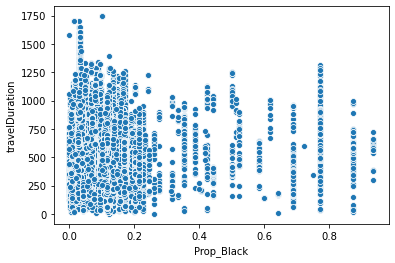

In [130]:
import seaborn as sns
sns.scatterplot(x='Prop_Black',y='travelDuration',data=waiting)

In [327]:
df.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'geometry', 'index_right', 'OBJECTID_1',
       'OBJECTID', 'STATE_FIPS', 'CNTY_FIPS', 'STCOFIPS', 'TRACT', 'BLKGRP',
       'FIPS', 'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE',
       'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER',
       'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC',
       'RENTER_OCC', 'SQMI', 'Shape_Leng', 'Sha

In [27]:
df=df.drop(['index_right','OBJECTID_1','OBJECTID','STATE_FIPS','CNTY_FIPS','STCOFIPS','TRACT','BLKGRP'],axis=1)

In [144]:
df

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
0       2020-04-21 17:34:19  2020-04-21 17:47:10                32.931741   
1       2019-09-23 13:00:00  2019-09-23 13:05:31                32.934094   
2       2019-08-06 21:30:00  2019-08-06 21:42:55                32.936103   
3       2019-04-03 11:28:17  2019-04-03 11:37:48                32.930262   
4       2019-04-03 11:56:11  2019-04-03 12:07:04                32.945021   
...                     ...                  ...                      ...   
272037  2019-07-24 12:13:51  2019-07-24 12:18:45                32.698255   
272038  2019-04-11 17:52:12  2019-04-11 18:03:03                32.842825   
272039  2019-01-23 03:56:00  2019-01-23 04:22:16                32.899800   
272040  2019-05-07 18:43:00  2019-05-07 19:00:14                33.099242   
272041  2019-11-25 18:26:58  2019-11-25 18:34:16                32.850174   

        requestedPickupLongitude  requestedDropoffLatitude  \
0                     -96.525914                 32.904062   
1                     -96.525330                 32.916508   
2                     -96.530935                 32.904062   
3                     -96.521496                 32.904062   
4                     -96.527977                 32.904128   
...                          ...                       ...   
272037                -96.682956                 32.718598   
272038                -96.691072                 32.855763   
272039                -97.040300                 32.900430   
272040                -96.733344                 33.033556   
272041                -96.773846                 32.900327   

        requestedDropoffLongitude                             serviceId  \
0                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
1                      -96.521620  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
2                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
3                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
4                      -96.563448  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
...                           ...                                   ...   
272037                 -96.685063  d05800ea-93bc-4e14-ae3b-419fee0a80a2   
272038                 -96.732869  d41799c0-2f24-4a22-a5d4-6b776aa7c949   
272039                 -97.173350  bc5bd214-d4ca-41fb-a6ef-9c5c412e7206   
272040                 -96.701109  1e995f05-cd00-4f9c-86a7-84e8867ee42d   
272041                 -96.768636  671bf16c-0ff1-4841-9795-1644d57bd56c   

           status  travelDistance  travelDuration  ...            completed  \
0       completed            7325             771  ...  2020-04-21 18:04:27   
1       completed            2742             331  ...                  NaN   
2       completed            6230             775  ...                  NaN   
3       completed            6751             571  ...                  NaN   
4       cancelled            6533             653  ...  2020-05-15 16:02:13   
...           ...             ...             ...  ...                  ...   
272037  completed            2841             294  ...  2019-05-03 14:32:04   
272038  cancelled            6111             651  ...                  NaN   
272039  completed           20036            1576  ...  2020-01-22 15:06:52   
272040  completed           10434            1034  ...  2019-04-01 22:09:37   
272041  cancelled            5895             438  ...  2019-03-13 19:23:38   

                  cancelled  noDriversAvailable  serviceDisruption  \
0                       NaN                 NaN                NaN   
1       2020-03-09 19:00:59                 NaN                NaN   
2       2019-05-08 02:29:54                 NaN                NaN   
3       2020-04-24 15:59:18                 NaN                NaN   
4                       NaN                 NaN                NaN   
...                     ...                 ...                ...   


In [145]:
test=df[(df['requestedPickupTs'] > '2020-02-01') ]


In [148]:
test=test[['requestedPickupTs','requestedPickupLatitude','requestedPickupLongitude']]

In [149]:
test.to_csv('geospatial.csv')

In [28]:
df=df.drop('geometry',axis=1)

In [29]:
df=pd.DataFrame(df)

In [337]:
df.to_csv('DART_CENSUS_DATA.csv')

In [ ]:
#distance and duration differences 

In [ ]:
##########################################

In [84]:
dd=pd.read_csv('DART_CENSUS_DATA.csv')

In [133]:
swtran
swtran.drop(swtran.columns[swtran.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [ ]:
myshpfile = geopandas.read_file('/Users/jacklobe/lighthouse/Final/tl_2019_27_tract/tl_2019_27_tract.shp')

In [ ]:
within=gpd.GeoDataFrame(sw_big, geometry=gpd.points_from_xy(sw_big.requestedPickupLongitude,sw_big.requestedPickupLatitude))

In [224]:
swtran_geo = gpd.sjoin(myshpfile, within, op='contains')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: None




In [225]:
swtran_geo.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'index_right', 'requestedPickupTs', 'requestedDropoffTs',
       'requestedPickupTsTimestamp', 'requestedDropoffTsTimestamp',
       'requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'status', 'statusChanges', 'travelDistance', 'travelDuration',
       'endpoint'],
      dtype='object')

In [227]:
swtran_geo.GEOID=swtran_geo.GEOID.astype(str)
swtran_race=swtran_geo.merge(micro_census,left_on='GEOID', right_on='CBG')


In [231]:
micro_census.CBG.unique()

array(['27053025701', '27019090701', '27053026005', '27053026006',
       '27053026019', '27053026020', '27019090800', '27019090601',
       '27053026007', '27019090501', '27019090402', '27053026022',
       '27053026015', '27019091000', '27053026013', '27019090900',
       '27053026016', '27053026021', '27019091100', '27053026014',
       '27019090702', '27019090503', '27019090502', '27053026018',
       '27019090602', '27019090401', '27053026104', '27053025905', nan],
      dtype=object)

In [238]:
import copy
census=copy.copy(micro_census)

In [240]:
census['CBG'] = census['CBG'].astype(str).str[:11]

In [267]:
census

CBG  WhitePop  TotalPop  NonWhitePop  ProportionNonWhite  \
0       10010201001       585       745          160           21.476510   
1       10010201002      1083      1265          182           14.387352   
2       10010202001       361       960          599           62.395833   
3       10010202002       615      1236          621           50.242718   
4       10010203001      1481      2364          883           37.351946   
...             ...       ...       ...          ...                 ...   
220328  72153750601       752       921          169           18.349620   
220329  72153750601      2230      2703          473           17.499075   
220330  72153750601      1085      1195          110            9.205021   
220331  72153750602      1662      2005          343           17.107232   
220332  72153750602       588       736          148           20.108696   

        TotalPopAged25+   6Th Grade   7Th Grade   8Th Grade   9Th Grade  ...  \
0                   474          23           0           0          53  ...   
1                   824           0           0           0          27  ...   
2                   602           0           0           6          17  ...   
3                   861           6           6          16          18  ...   
4                  1648           0           5           5          39  ...   
...                 ...         ...         ...         ...         ...  ...   
220328              599           0          57           0          57  ...   
220329             1599           0          11          30          26  ...   
220330              699           0           0           0           9  ...   
220331             1600         197           8          11         103  ...   
220332              675          33          24           8         107  ...   

         Ged Or Alternative Credential  ProportionHighSchoolEducatedOrLess  \
0                                   21                           53.164557   
1                                   51                           39.320388   
2                                   51                           58.970100   
3                                   59                           53.426249   
4                                   40                           43.689320   
...                                ...                                 ...   
220328                               0                           59.265442   
220329                              30                           42.213884   
220330                               9                           17.882690   
220331                              27                           55.437500   
220332                               0                           73.629630   

        Median household income  Total Occupied Units  \
0                           NaN                   284   
1                       77813.0                   456   
2                       25179.0                   386   
3                       45104.0                   452   
4                       55222.0                   824   
...                         ...                   ...   
220328                  13171.0                   280   
220329                  24308.0                   657   
220330                  40625.0                   239   
220331                   9006.0                   567   
220332                   6360.0                   211   

        Total Occupied Owner Units With Zero Vehicles  \
0                                                   0   
1                                                   4   
2                                                  13   
3                                                  12   
4                                                   6   
...                                               ...   
220328                                             58   
220329                                             52   
220330 

In [268]:
swtran_geo

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  \
149       27      053  027504  27053027504  275.04  Census Tract 275.04   
149       27      053  027504  27053027504  275.04  Census Tract 275.04   
149       27      053  027504  27053027504  275.04  Census Tract 275.04   
239       27      053  024005  27053024005  240.05  Census Tract 240.05   
239       27      053  024005  27053024005  240.05  Census Tract 240.05   
...      ...      ...     ...          ...     ...                  ...   
1244      27      053  025701  27053025701  257.01  Census Tract 257.01   
1244      27      053  025701  27053025701  257.01  Census Tract 257.01   
1244      27      053  025701  27053025701  257.01  Census Tract 257.01   
1244      27      053  025701  27053025701  257.01  Census Tract 257.01   
1244      27      053  025701  27053025701  257.01  Census Tract 257.01   

      MTFCC FUNCSTAT    ALAND   AWATER  ... requestedPickupLatitude  \
149   G5020        S  5412261  1332605  ...               44.891027   
149   G5020        S  5412261  1332605  ...               44.891306   
149   G5020        S  5412261  1332605  ...               44.891306   
239   G5020        S  1152234     1733  ...               44.884951   
239   G5020        S  1152234     1733  ...               44.884951   
...     ...      ...      ...      ...  ...                     ...   
1244  G5020        S  5462963   192277  ...               44.828793   
1244  G5020        S  5462963   192277  ...               44.828929   
1244  G5020        S  5462963   192277  ...               44.829056   
1244  G5020        S  5462963   192277  ...               44.829173   
1244  G5020        S  5462963   192277  ...               44.829395   

     requestedPickupLongitude requestedDropoffLatitude  \
149                -93.549051                44.868232   
149                -93.527170                44.859937   
149                -93.527170                44.859937   
239                -93.327668                44.835125   
239                -93.327668                44.835125   
...                       ...                      ...   
1244               -93.331086                44.819091   
1244               -93.333042                44.855558   
1244               -93.332999                44.838758   
1244               -93.330992                44.855558   
1244               -93.331066                44.869624   

      requestedDropoffLongitude                             serviceId  \
149                  -93.545327  089fdbc8-ef59-4f15-a169-f9ae78818ece   
149                  -93.444019  089fdbc8-ef59-4f15-a169-f9ae78818ece   
149                  -93.444019  089fdbc8-ef59-4f15-a169-f9ae78818ece   
239                  -93.603328  f58d9940-0300-46e0-87cf-3ab8b72abba1   
239                  -93.603328  f58d9940-0300-46e0-87cf-3ab8b72abba1   
...                         ...                                   ...   
1244                 -93.633853  779aa6c2-27c5-4643-978a-49e3d1bbb176   
1244                 -93.424603  779aa6c2-27c5-4643-978a-49e3d1bbb176   
1244                 -93.445446  779aa6c2-27c5-4643-978a-49e3d1bbb176   
1244                 -93.424603  779aa6c2-27c5-4643-978a-49e3d1bbb176   
1244                 -93.501865  779aa6c2-27c5-4643-978a-49e3d1bbb176   

         status                                      statusChanges  \
149   cancelled  [{"ts": 1574531569, "status": "processing"}, {...   
149   completed  [{"ts": 1567026113, "status": "processing"}, {...   
149   completed  [{"ts": 1567111827, "status": "processing"}, {...   
239   cancelled  [{"ts": 1575397290, "status": "processing"}, {...   
239   cancelled  [{"ts": 1575398836, "status": "processing"}, {...   
...         ...                                                ...   
1244  completed  [{"ts": 1600182917, "status": "processing"}, {...   
1244  completed  [{"ts": 1598896241, "status": "processing"}, {...   
1244  completed  [{"ts": 1599255088, "status": 

In [247]:
swtotal=swtran_geo.merge(census,left_on='GEOID', right_on='CBG')
swtotal=swtotal.drop_duplicates(subset='index_right')

In [85]:
dd

Unnamed: 0    requestedPickupTs   requestedDropoffTs  \
0                0  2020-04-21 17:34:19  2020-04-21 17:47:10   
1               44  2019-09-23 13:00:00  2019-09-23 13:05:31   
2               52  2019-08-06 21:30:00  2019-08-06 21:42:55   
3               59  2019-04-03 11:28:17  2019-04-03 11:37:48   
4               65  2019-04-03 11:56:11  2019-04-03 12:07:04   
...            ...                  ...                  ...   
272037      237278  2019-07-24 12:13:51  2019-07-24 12:18:45   
272038      184398  2019-04-11 17:52:12  2019-04-11 18:03:03   
272039      193418  2019-01-23 03:56:00  2019-01-23 04:22:16   
272040      241270  2019-05-07 18:43:00  2019-05-07 19:00:14   
272041      262563  2019-11-25 18:26:58  2019-11-25 18:34:16   

        requestedPickupLatitude  requestedPickupLongitude  \
0                     32.931741                -96.525914   
1                     32.934094                -96.525330   
2                     32.936103                -96.530935   
3                     32.930262                -96.521496   
4                     32.945021                -96.527977   
...                         ...                       ...   
272037                32.698255                -96.682956   
272038                32.842825                -96.691072   
272039                32.899800                -97.040300   
272040                33.099242                -96.733344   
272041                32.850174                -96.773846   

        requestedDropoffLatitude  requestedDropoffLongitude  \
0                      32.904062                 -96.564146   
1                      32.916508                 -96.521620   
2                      32.904062                 -96.564146   
3                      32.904062                 -96.564146   
4                      32.904128                 -96.563448   
...                          ...                        ...   
272037                 32.718598                 -96.685063   
272038                 32.855763                 -96.732869   
272039                 32.900430                 -97.173350   
272040                 33.033556                 -96.701109   
272041                 32.900327                 -96.768636   

                                   serviceId     status  travelDistance  ...  \
0       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            7325  ...   
1       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            2742  ...   
2       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            6230  ...   
3       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            6751  ...   
4       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  cancelled            6533  ...   
...                                      ...        ...             ...  ...   
272037  d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed            2841  ...   
272038  d41799c0-2f24-4a22-a5d4-6b776aa7c949  cancelled            6111  ...   
272039  bc5bd214-d4ca-41fb-a6ef-9c5c412e7206  completed           20036  ...   
272040  1e995f05-cd00-4f9c-86a7-84e8867ee42d  completed           10434  ...   
272041  671bf16c-0ff1-4841-9795-1644d57bd56c  cancelled            5895  ...   

                 inProgress            completed            cancelled  \
0       2020-04-21 17:44:04  2020-04-21 18:04:27                  NaN   
1                       NaN                  NaN  2020-03-09 19:00:59   
2                       NaN                  NaN  2019-05-08 02:29:54   
3                       NaN                  NaN  2020-04-24 15:59:18   
4       2020-05-15 15:51:39  2020-05-15 16:02:13                  NaN   
...                     ...                  ...                  ...   
272037  2019-05-03 14:26:38  2019-05-03 14:32:04                  NaN   
272038                  NaN                  NaN  2019-04-15 22:06:00   
272039  2020-01-22 14:56:01  2020-01-22 15:06:52                  NaN   
272040  2019-04-01 22:00:26  2019-04-01 22:09:37          

39

In [282]:
swtotal.to_file('swtotal.geojson',driver='GeoJSON')

In [286]:
swtotal=swtotal.drop('geometry',axis=1)

In [291]:
df=pd.DataFrame(swtotal)

In [293]:
df.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'index_right',
       'requestedPickupTs', 'requestedDropoffTs', 'requestedPickupTsTimestamp',
       'requestedDropoffTsTimestamp', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'statusChanges',
       'travelDistance', 'travelDuration', 'endpoint', 'CBG', 'WhitePop',
       'TotalPop', 'NonWhitePop', 'ProportionNonWhite', 'TotalPopAged25+',
       ' 6Th Grade', ' 7Th Grade', ' 8Th Grade', ' 9Th Grade', ' 10Th Grade',
       ' 11Th Grade', ' 12Th Grade, No Diploma',
       ' Regular High School Diploma', ' Ged Or Alternative Credential',
       'ProportionHighSchoolEducatedOrLess', 'Median household income',
       'Total Occupied Units', 'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
  

In [294]:
df.to_csv('racial_swtran.csv')

In [6]:
####################################################################
#MICROTRANSIT ANALYSIS
swtran=pd.read_csv('racial_swtran.csv')
swtran.drop(swtran.columns[swtran.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [57]:
df=df.drop(['completed','cancelled','noDriversAvailable','serviceDistruption','Shape_Leng','Shape__Area','Shape__Length'],axis=1)

In [7]:
swtran=swtran.drop(['STATEFP','COUNTYFP','TRACTCE','NAME','NAMELSAD','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON','index_right','requestedPickupTsTimestamp','requestedDropoffTsTimestamp'],axis=1)

In [8]:
B=json_normalize(swtran['statusChanges'].apply(list_of_dicts).tolist())
swtran=swtran.join(B)

In [9]:
for i in metrics:
    swtran[i]=pd.DatetimeIndex(pd.to_datetime(swtran[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [10]:
swtran['requestedPickupTs']=pd.DatetimeIndex(pd.to_datetime(swtran['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
swtran['requestedDropoffTs']=pd.DatetimeIndex(pd.to_datetime(swtran['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [11]:
swtran['Difference']=swtran['inProgress']-swtran['accepted']
swtran['Difference'] = swtran['Difference'] / np.timedelta64(1, 'm')

In [12]:
swtran.columns

Index(['GEOID', 'requestedPickupTs', 'requestedDropoffTs',
       'requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'status', 'statusChanges', 'travelDistance', 'travelDuration',
       'endpoint', 'CBG', 'WhitePop', 'TotalPop', 'NonWhitePop',
       'ProportionNonWhite', 'TotalPopAged25+', ' 6Th Grade', ' 7Th Grade',
       ' 8Th Grade', ' 9Th Grade', ' 10Th Grade', ' 11Th Grade',
       ' 12Th Grade, No Diploma', ' Regular High School Diploma',
       ' Ged Or Alternative Credential', 'ProportionHighSchoolEducatedOrLess',
       'Median household income', 'Total Occupied Units',
       'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
       'ProportionOfZeroCarHouseholds', 'TotalPopWhoseIncomeWasAssessed',
       'PopBelowPovertyLevel', 'ProportionBelowPovertyLevel', 'processing',
       'accepted', 'arriving', 'cancelled', 'inProgress', 'c

In [13]:
swtran=swtran.drop(['completed','cancelled','noDriversAvailable','serviceDisruption'],axis=1)

In [14]:
df['weekday'] = df.requestedPickupTs.dt.day_name()
df['month'] = df.requestedPickupTs.dt.month
df['day'] = df.requestedPickupTs.dt.day
df['hour'] = df.requestedPickupTs.dt.hour
df['minute'] = df.requestedPickupTs.dt.minute

## customized features
# rides['month_name'] = rides.timestamp.dt.strftime('%B')
# rides['day_hour'] = rides.timestamp.dt.strftime('%d-%H')

## ocular analysis
df.head()

NameError: name 'df' is not defined

In [40]:
day_map = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

df['weekday'] = pd.Categorical(df['weekday'], categories=day_map, ordered=True)

In [41]:
## groupby operation
hourly_ride_data = df.groupby(['day','hour','weekday'])['requestedPickupTs'].count()

## reset index
hourly_ride_data = hourly_ride_data.reset_index()

## rename column
hourly_ride_data = hourly_ride_data.rename(columns = {'requestedPickupTs':'ride_count'})

## ocular analysis
hourly_ride_data.head()

day  hour    weekday  ride_count
0    1     0     Monday           4
1    1     0    Tuesday          49
2    1     0  Wednesday         100
3    1     0   Thursday          46
4    1     0     Friday         121

In [42]:
## groupby operation
weekday_hourly_avg = hourly_ride_data.groupby(['weekday','hour'])['ride_count'].mean()

## reset index
weekday_hourly_avg = weekday_hourly_avg.reset_index()

## rename column
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

## sort by categorical index
weekday_hourly_avg = weekday_hourly_avg.sort_index()

## ocular analysis
weekday_hourly_avg.head()

weekday  hour  average_rides
0  Monday     0       6.354839
1  Monday     1       0.322581
2  Monday     2       0.000000
3  Monday     3       0.000000
4  Monday     4       0.000000

In [43]:
tableau_color_blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]

for i in range(len(tableau_color_blind)):  
    r, g, b = tableau_color_blind[i]  
    tableau_color_blind[i] = (r / 255., g / 255., b / 255.)

Text(0.5, 0, 'Hour')

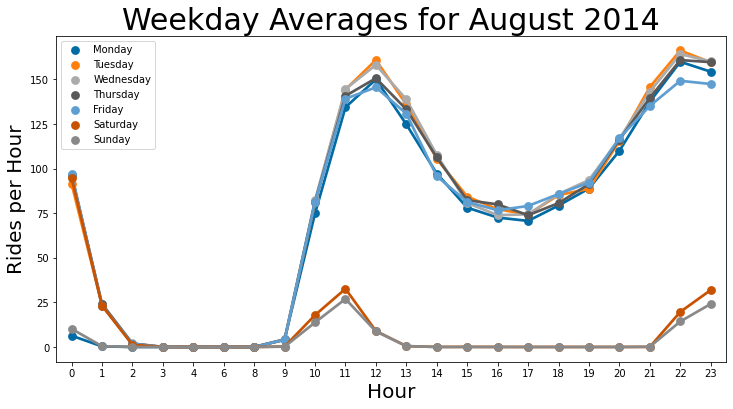

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

## set palette   
current_palette = sns.color_palette(tableau_color_blind)

## plot data
sns.pointplot(ax=ax, x='hour',y='average_rides',hue='weekday', 
              palette = current_palette, data = weekday_hourly_avg)

## clean up the legend
l = ax.legend()
l.set_title('')

## format plot labels
ax.set_title('Weekday Averages for 2019', fontsize=30)
ax.set_ylabel('Rides per Hour', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

In [46]:
df.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

Text(0, 0.5, 'Inertia')

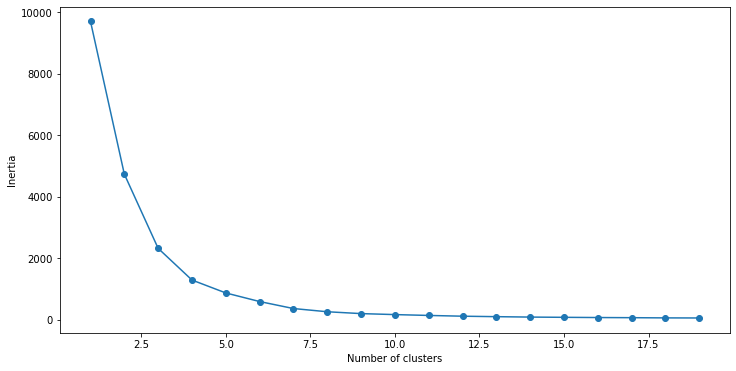

In [86]:
from sklearn.cluster import KMeans
clus=dd[['requestedPickupLatitude','requestedPickupLongitude']]
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(clus)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [72]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(clus)
centroids=kmeans.cluster_centers_

In [87]:
data=dd[['requestedPickupLatitude','requestedPickupLongitude']]

In [88]:
clustering_kmeans = KMeans(n_clusters=6, precompute_distances="auto",max_iter=2000)
dd['clusters'] = clustering_kmeans.fit_predict(data)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


In [96]:
centroids=clustering_kmeans.cluster_centers_
cents=pd.DataFrame(centroids)
cents=cents.rename(columns={0: "Centroid Latitude", 1: "Centroid Longitude"})


In [126]:
black=pd.DataFrame(df.groupby(df.clusters)['Prop_Black'].median().sort_values(ascending=False))


In [100]:
black=pd.DataFrame(df.groupby(df.clusters)['Prop_Black'].median().sort_values(ascending=False))
females=pd.DataFrame(df.groupby(df.clusters)['FEMALES'].median().sort_values(ascending=False))
males=pd.DataFrame(df.groupby(df.clusters)['MALES'].median().sort_values(ascending=False))
white=pd.DataFrame(df.groupby(df.clusters)['Prop_White'].median().sort_values(ascending=False))
pop=pd.DataFrame(df.groupby(df.clusters)['POPULATION'].median().sort_values(ascending=False))
rides=pd.DataFrame(df.groupby(df.clusters)['clusters'].count())
rides=rides.rename(columns={"clusters": "ride_count"})
fips=pd.DataFrame(df.groupby(df.clusters)['FIPS'].unique())
dataframes=[black,white,females,males,pop,rides,fips]
dataframes=[black,white,females,males,pop,rides,fips]
f_merged = reduce(lambda  left,right: pd.merge(left,right,on=['clusters'],
                                            how='outer'), dataframes)
# cents=pd.DataFrame(centroids)
# cents=cents.rename(columns={0: "Centroid Latitude", 1: "Centroid Longitude"})

cents.index.name = 'clusters'
dallas=f_merged.merge(cents,left_on='clusters', right_on='clusters')


In [101]:
dallas

Prop_Black  Prop_White  FEMALES  MALES  POPULATION  ride_count  \
clusters                                                                   
1           0.770072    0.065789     1246   1024        2653       38809   
0           0.096904    0.711978      717    688        1523       60606   
4           0.063522    0.573161      519    613        1237       48730   
5           0.039227    0.476581      743    844        1708       33748   
3           0.016129    0.773548      569    521        1197       51149   
2           0.006936    0.701734      423    374         865       39000   

                                                       FIPS  \
clusters                                                      
1         [481130202003, 481130113001, 481130166232, 481...   
0         [481130181242, 481130181351, 481130181331, 481...   
4         [480850316301, 480850316322, 480850319001, 480...   
5         [481130093011, 481130116022, 481130171022, 481...   
3         [481130131051, 481130140013, 481130130111, 481...   
2         [480850316571, 480850316562, 480850316361, 480...   

          Centroid Latitude  Centroid Longitude  
clusters                                         
1                 32.634241          -96.787835  
0                 33.051126          -96.708266  
4                 32.882181          -96.790554  
5                 32.699205          -96.649717  
3                 33.076173          -96.819357  
2                 32.907882          -96.549543

In [14]:
pd.DataFrame(df.groupby(df.clusters)['cancelled'].count().sort_values(ascending=False))
#try and increase granularity within clusters ###cut to the most interesting blocks 

cancelled
clusters           
2             13942
4             11777
0             11155
3              8923
1              8873
5              7812

In [17]:
pd.DataFrame(df.groupby(df.clusters)['noDriversAvailable'].count().sort_values(ascending=False))


noDriversAvailable
clusters                    
2                       1550
4                       1356
0                       1242
1                       1050
3                        964
5                        832

In [22]:
pd.DataFrame(df.groupby(df.clusters).count().sort_values(by='requestedPickupTs', ascending=False))
#demand obviously results in cancellations and missed drives 

requestedPickupTs  requestedDropoffTs  requestedPickupLatitude  \
clusters                                                                   
2                     60606               60606                    60606   
4                     51149               51149                    51149   
0                     48730               48730                    48730   
3                     39000               39000                    39000   
1                     38809               38809                    38809   
5                     33748               33748                    33748   

          requestedPickupLongitude  requestedDropoffLatitude  \
clusters                                                       
2                            60606                     60606   
4                            51149                     51149   
0                            48730                     48730   
3                            39000                     39000   
1                            38809                     38809   
5                            33748                     33748   

          requestedDropoffLongitude  serviceId  status  travelDistance  \
clusters                                                                 
2                             60606      60606   60606           60606   
4                             51149      51149   51149           51149   
0                             48730      48730   48730           48730   
3                             39000      39000   39000           39000   
1                             38809      38809   38809           38809   
5                             33748      33748   33748           33748   

          travelDuration  ...  inProgress  completed  cancelled  \
clusters                  ...                                     
2                  60606  ...       45517      45202      13942   
4                  51149  ...       38349      38086      11777   
0                  48730  ...       36648      36390      11155   
3                  39000  ...       29367      29160       8923   
1                  38809  ...       29135      28930       8873   
5                  33748  ...       25324      25153       7812   

          noDriversAvailable  serviceDisruption  Prop_Black  Prop_White  \
clusters                                                                  
2                       1550                 71       60606       60606   
4                       1356                 51       51149       51149   
0                       1242                 55       48730       48730   
3                        964                 51       39000       39000   
1                       1050                 42       38809       38809   
5                        832                 37       33748       33748   

          Prop_Hispanic  Prop_Asian  Difference  
clusters                                         
2                 60606       60606       45517  
4                 51149       51149       38349  
0                 48730       48730       36648  
3                 39000       39000       29367  
1                 38809       38809       29135  
5                 33748       33748       25324  

[6 rows x 72 columns]

In [25]:
pd.DataFrame(df.groupby(df.clusters)['Difference'].describe().sort_values(by='mean',ascending=False))


count        mean          std        min        25%        50%  \
clusters                                                                      
2         45517.0  338.382672  1206.880452  -0.833333  10.416667  26.116667   
5         25324.0  332.492508  1204.191744 -15.550000  10.233333  25.700000   
3         29367.0  329.837727  1198.395225 -14.916667  10.083333  26.150000   
4         38349.0  328.117591  1192.739738   0.000000  10.200000  25.733333   
1         29135.0  318.630562  1165.008321  -2.500000  10.250000  25.433333   
0         36648.0  315.154990  1153.409559  -8.633333  10.133333  25.933333   

                75%           max  
clusters                           
2         55.516667  12475.300000  
5         54.616667  12252.183333  
3         55.266667  12174.233333  
4         54.516667  12168.000000  
1         54.366667  12182.333333  
0         54.720833  12205.850000

In [9]:
 df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [10]:
df.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

Prop_Black  Prop_White  FEMALES  MALES  POPULATION  ride_count  \
clusters                                                                   
1           0.770072    0.065789     1246   1024        2653       38809   
0           0.096904    0.711978      717    688        1523       60606   
4           0.063522    0.573161      519    613        1237       48730   
5           0.039227    0.476581      743    844        1708       33748   
3           0.016129    0.773548      569    521        1197       51149   
2           0.006936    0.701734      423    374         865       39000   

                                                       FIPS  
clusters                                                     
1         [481130202003, 481130113001, 481130166232, 481...  
0         [481130181242, 481130181351, 481130181331, 481...  
4         [480850316301, 480850316322, 480850319001, 480...  
5         [481130093011, 481130116022, 481130171022, 481...  
3         [481130131051, 481130140013, 481130130111, 481...  
2         [480850316571, 480850316562, 480850316361, 480...

In [105]:
dd

Unnamed: 0    requestedPickupTs   requestedDropoffTs  \
0                0  2020-04-21 17:34:19  2020-04-21 17:47:10   
1               44  2019-09-23 13:00:00  2019-09-23 13:05:31   
2               52  2019-08-06 21:30:00  2019-08-06 21:42:55   
3               59  2019-04-03 11:28:17  2019-04-03 11:37:48   
4               65  2019-04-03 11:56:11  2019-04-03 12:07:04   
...            ...                  ...                  ...   
272037      237278  2019-07-24 12:13:51  2019-07-24 12:18:45   
272038      184398  2019-04-11 17:52:12  2019-04-11 18:03:03   
272039      193418  2019-01-23 03:56:00  2019-01-23 04:22:16   
272040      241270  2019-05-07 18:43:00  2019-05-07 19:00:14   
272041      262563  2019-11-25 18:26:58  2019-11-25 18:34:16   

        requestedPickupLatitude  requestedPickupLongitude  \
0                     32.931741                -96.525914   
1                     32.934094                -96.525330   
2                     32.936103                -96.530935   
3                     32.930262                -96.521496   
4                     32.945021                -96.527977   
...                         ...                       ...   
272037                32.698255                -96.682956   
272038                32.842825                -96.691072   
272039                32.899800                -97.040300   
272040                33.099242                -96.733344   
272041                32.850174                -96.773846   

        requestedDropoffLatitude  requestedDropoffLongitude  \
0                      32.904062                 -96.564146   
1                      32.916508                 -96.521620   
2                      32.904062                 -96.564146   
3                      32.904062                 -96.564146   
4                      32.904128                 -96.563448   
...                          ...                        ...   
272037                 32.718598                 -96.685063   
272038                 32.855763                 -96.732869   
272039                 32.900430                 -97.173350   
272040                 33.033556                 -96.701109   
272041                 32.900327                 -96.768636   

                                   serviceId     status  travelDistance  ...  \
0       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            7325  ...   
1       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            2742  ...   
2       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            6230  ...   
3       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed            6751  ...   
4       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  cancelled            6533  ...   
...                                      ...        ...             ...  ...   
272037  d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed            2841  ...   
272038  d41799c0-2f24-4a22-a5d4-6b776aa7c949  cancelled            6111  ...   
272039  bc5bd214-d4ca-41fb-a6ef-9c5c412e7206  completed           20036  ...   
272040  1e995f05-cd00-4f9c-86a7-84e8867ee42d  completed           10434  ...   
272041  671bf16c-0ff1-4841-9795-1644d57bd56c  cancelled            5895  ...   

                  completed            cancelled  noDriversAvailable  \
0       2020-04-21 18:04:27                  NaN                 NaN   
1                       NaN  2020-03-09 19:00:59                 NaN   
2                       NaN  2019-05-08 02:29:54                 NaN   
3                       NaN  2020-04-24 15:59:18                 NaN   
4       2020-05-15 16:02:13                  NaN                 NaN   
...                     ...                  ...                 ...   
272037  2019-05-03 14:32:04                  NaN                 NaN   
272038                  NaN  2019-04-15 22:06:00                 NaN   
272039  2020-01-22 15:06:52                  NaN                 NaN   
272040  2019-04-01 22:09:37                  NaN                 NaN

Prop_Black  Prop_White  FEMALES  MALES  POPULATION  ride_count  \
clusters                                                                   
1           0.770072    0.065789     1246   1024        2653       38809   
0           0.096904    0.711978      717    688        1523       60606   
4           0.063522    0.573161      519    613        1237       48730   
3           0.016129    0.773548      569    521        1197       51149   
2           0.006936    0.701734      423    374         865       39000   

                                                       FIPS  \
clusters                                                      
1         [481130202003, 481130113001, 481130166232, 481...   
0         [481130181242, 481130181351, 481130181331, 481...   
4         [480850316301, 480850316322, 480850319001, 480...   
3         [481130131051, 481130140013, 481130130111, 481...   
2         [480850316571, 480850316562, 480850316361, 480...   

          Centroid Latitude  Centroid Longitude  
clusters                                         
1                 32.634241          -96.787835  
0                 33.062337          -96.757518  
4                 32.699205          -96.649717  
3                 32.882299          -96.790736  
2                 32.907882          -96.549543

In [106]:
dd.to_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/dallas_kmeans.csv')

In [151]:
swtran.columns

Index(['GEOID', 'requestedPickupTs', 'requestedDropoffTs',
       'requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'status', 'statusChanges', 'travelDistance', 'travelDuration',
       'endpoint', 'CBG', 'WhitePop', 'TotalPop', 'NonWhitePop',
       'ProportionNonWhite', 'TotalPopAged25+', ' 6Th Grade', ' 7Th Grade',
       ' 8Th Grade', ' 9Th Grade', ' 10Th Grade', ' 11Th Grade',
       ' 12Th Grade, No Diploma', ' Regular High School Diploma',
       ' Ged Or Alternative Credential', 'ProportionHighSchoolEducatedOrLess',
       'Median household income', 'Total Occupied Units',
       'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
       'ProportionOfZeroCarHouseholds', 'TotalPopWhoseIncomeWasAssessed',
       'PopBelowPovertyLevel', 'ProportionBelowPovertyLevel', 'processing',
       'accepted', 'arriving', 'inProgress', 'Difference'],


In [18]:
data=swtran[['requestedPickupLatitude','requestedPickupLongitude']]

Text(0, 0.5, 'Inertia')

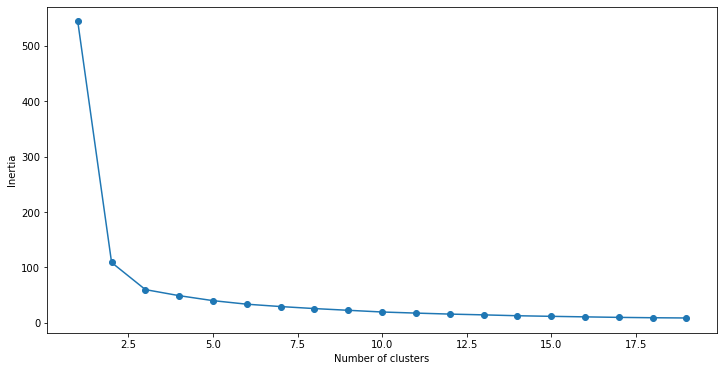

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
clus=swtran[['requestedPickupLatitude','requestedPickupLongitude']]
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(clus)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(clus)
centroids=kmeans.cluster_centers_

In [33]:
swtran.columns

Index(['GEOID', 'requestedPickupTs', 'requestedDropoffTs',
       'requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'status', 'statusChanges', 'travelDistance', 'travelDuration',
       'endpoint', 'CBG', 'WhitePop', 'TotalPop', 'NonWhitePop',
       'ProportionNonWhite', 'TotalPopAged25+', ' 6Th Grade', ' 7Th Grade',
       ' 8Th Grade', ' 9Th Grade', ' 10Th Grade', ' 11Th Grade',
       ' 12Th Grade, No Diploma', ' Regular High School Diploma',
       ' Ged Or Alternative Credential', 'ProportionHighSchoolEducatedOrLess',
       'Median household income', 'Total Occupied Units',
       'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
       'ProportionOfZeroCarHouseholds', 'TotalPopWhoseIncomeWasAssessed',
       'PopBelowPovertyLevel', 'ProportionBelowPovertyLevel', 'processing',
       'accepted', 'arriving', 'inProgress', 'Difference', '

In [30]:




swtran['Prop_minority']=swtran['NonWhitePop']/swtran['TotalPop']
swtran['Prop_white']=swtran['WhitePop']/swtran['TotalPop']


In [31]:
clustering_kmeans = KMeans(n_clusters=6,max_iter=2000)
swtran['clusters'] = clustering_kmeans.fit_predict(data)

In [37]:
black=pd.DataFrame(swtran.groupby(swtran.clusters)['Prop_minority'].median().sort_values(ascending=False))

white=pd.DataFrame(swtran.groupby(swtran.clusters)['Prop_white'].median().sort_values(ascending=False))
pop=pd.DataFrame(swtran.groupby(swtran.clusters)['TotalPop'].median().sort_values(ascending=False))
rides=pd.DataFrame(swtran.groupby(swtran.clusters)['clusters'].count())
rides=rides.rename(columns={"clusters": "ride_count"})
fips=pd.DataFrame(swtran.groupby(swtran.clusters)['GEOID'].unique())
dataframes=[black,white,pop,rides,fips]
dataframes=[black,white,pop,rides,fips]
f_merged = reduce(lambda  left,right: pd.merge(left,right,on=['clusters'],
                                            how='outer'), dataframes)
cents=pd.DataFrame(centroids)
cents=cents.rename(columns={0: "Centroid Latitude", 1: "Centroid Longitude"})

cents.index.name = 'clusters'
southwest=f_merged.merge(cents,left_on='clusters', right_on='clusters')


In [40]:
swtran.to_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/swtran_clusters.csv')

Prop_minority  Prop_white  TotalPop  ride_count  \
clusters                                                    
2              0.137726    0.862274      1575        9722   
0              0.110270    0.889730      1557        7448   
1              0.043020    0.956980      1890       13648   

                                                      GEOID  \
clusters                                                      
2         [27053027504, 27019090701, 27019090702, 270190...   
0         [27053026006, 27053026202, 27053026013, 270530...   
1         [27019090701, 27019090702, 27019090800, 270190...   

          Centroid Latitude  Centroid Longitude  
clusters                                         
2                 44.859860          -93.523683  
0                 44.855818          -93.436254  
1                 44.815640          -93.606418

In [104]:
swtran

GEOID   requestedPickupTs  requestedDropoffTs  \
0      27053027504 2019-11-23 17:52:49 2019-11-23 18:00:23   
1      27053027504 2019-08-28 21:01:53 2019-08-28 21:14:20   
2      27053027504 2019-08-29 20:50:27 2019-08-29 21:02:54   
3      27053024005 2019-12-03 18:21:30 2019-12-03 18:44:09   
4      27053024005 2019-12-03 18:47:16 2019-12-03 19:09:46   
...            ...                 ...                 ...   
82114  27053025701 2020-09-15 15:55:00 2020-09-15 16:26:55   
82115  27053025701 2020-08-31 17:55:00 2020-08-31 18:13:01   
82116  27053025701 2020-09-04 21:55:00 2020-09-04 22:15:13   
82117  27053025701 2020-08-31 17:55:00 2020-08-31 18:13:01   
82118  27053025701 2020-09-21 19:55:00 2020-09-21 20:14:26   

       requestedPickupLatitude  requestedPickupLongitude  \
0                    44.891027                -93.549051   
1                    44.891306                -93.527170   
2                    44.891306                -93.527170   
3                    44.884951                -93.327668   
4                    44.884951                -93.327668   
...                        ...                       ...   
82114                44.828793                -93.331086   
82115                44.828929                -93.333042   
82116                44.829056                -93.332999   
82117                44.829173                -93.330992   
82118                44.829395                -93.331066   

       requestedDropoffLatitude  requestedDropoffLongitude  \
0                     44.868232                 -93.545327   
1                     44.859937                 -93.444019   
2                     44.859937                 -93.444019   
3                     44.835125                 -93.603328   
4                     44.835125                 -93.603328   
...                         ...                        ...   
82114                 44.819091                 -93.633853   
82115                 44.855558                 -93.424603   
82116                 44.838758                 -93.445446   
82117                 44.855558                 -93.424603   
82118                 44.869624                 -93.501865   

                                  serviceId     status  \
0      089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
1      089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
2      089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
3      f58d9940-0300-46e0-87cf-3ab8b72abba1  cancelled   
4      f58d9940-0300-46e0-87cf-3ab8b72abba1  cancelled   
...                                     ...        ...   
82114  779aa6c2-27c5-4643-978a-49e3d1bbb176  completed   
82115  779aa6c2-27c5-4643-978a-49e3d1bbb176  completed   
82116  779aa6c2-27c5-4643-978a-49e3d1bbb176  completed   
82117  779aa6c2-27c5-4643-978a-49e3d1bbb176  cancelled   
82118  779aa6c2-27c5-4643-978a-49e3d1bbb176  completed   

                                           statusChanges  ...  \
0      [{"ts": 1574531569, "status": "processing"}, {...  ...   
1      [{"ts": 1567026113, "status": "processing"}, {...  ...   
2      [{"ts": 1567111827, "status": "processing"}, {...  ...   
3      [{"ts": 1575397290, "status": "processing"}, {...  ...   
4      [{"ts": 1575398836, "status": "processing"}, {...  ...   
...                                                  ...  ...   
82114  [{"ts": 1600182917, "status": "processing"}, {...  ...   
82115  [{"ts": 1598896241, "status": "processing"}, {...  ...   
82116  [{"ts": 1599255088, "status": "processing"}, {...  ...   
82117  [{"ts": 1598894625, "status": "processing"}, {...  ...   
82118  [{"ts": 1600717983, "status": "processing"}, {...  ...   

       PopBelowPovertyLevel  ProportionBelowPovertyLevel          processing  \
0                        41                     5.608755 2019-11-23 17:52:49   
1                        41                     5.608755 2019-08-28 21:01:53   
2                        41                     5.608755 2019-08-29 20:50:27   
3   

In [6]:
df=pd.read_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/dallas_kmeans.csv')


In [7]:
df

Unnamed: 0  Unnamed: 0.1    requestedPickupTs   requestedDropoffTs  \
0                0             0  2020-04-21 17:34:19  2020-04-21 17:47:10   
1                1            44  2019-09-23 13:00:00  2019-09-23 13:05:31   
2                2            52  2019-08-06 21:30:00  2019-08-06 21:42:55   
3                3            59  2019-04-03 11:28:17  2019-04-03 11:37:48   
4                4            65  2019-04-03 11:56:11  2019-04-03 12:07:04   
...            ...           ...                  ...                  ...   
272037      272037        237278  2019-07-24 12:13:51  2019-07-24 12:18:45   
272038      272038        184398  2019-04-11 17:52:12  2019-04-11 18:03:03   
272039      272039        193418  2019-01-23 03:56:00  2019-01-23 04:22:16   
272040      272040        241270  2019-05-07 18:43:00  2019-05-07 19:00:14   
272041      272041        262563  2019-11-25 18:26:58  2019-11-25 18:34:16   

        requestedPickupLatitude  requestedPickupLongitude  \
0                     32.931741                -96.525914   
1                     32.934094                -96.525330   
2                     32.936103                -96.530935   
3                     32.930262                -96.521496   
4                     32.945021                -96.527977   
...                         ...                       ...   
272037                32.698255                -96.682956   
272038                32.842825                -96.691072   
272039                32.899800                -97.040300   
272040                33.099242                -96.733344   
272041                32.850174                -96.773846   

        requestedDropoffLatitude  requestedDropoffLongitude  \
0                      32.904062                 -96.564146   
1                      32.916508                 -96.521620   
2                      32.904062                 -96.564146   
3                      32.904062                 -96.564146   
4                      32.904128                 -96.563448   
...                          ...                        ...   
272037                 32.718598                 -96.685063   
272038                 32.855763                 -96.732869   
272039                 32.900430                 -97.173350   
272040                 33.033556                 -96.701109   
272041                 32.900327                 -96.768636   

                                   serviceId     status  ...  \
0       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed  ...   
1       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed  ...   
2       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed  ...   
3       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  completed  ...   
4       d0a57efd-e2cc-4a03-9ae6-fef917a74b76  cancelled  ...   
...                                      ...        ...  ...   
272037  d05800ea-93bc-4e14-ae3b-419fee0a80a2  completed  ...   
272038  d41799c0-2f24-4a22-a5d4-6b776aa7c949  cancelled  ...   
272039  bc5bd214-d4ca-41fb-a6ef-9c5c412e7206  completed  ...   
272040  1e995f05-cd00-4f9c-86a7-84e8867ee42d  completed  ...   
272041  671bf16c-0ff1-4841-9795-1644d57bd56c  cancelled  ...   

                  completed            cancelled noDriversAvailable  \
0       2020-04-21 18:04:27                  NaN                NaN   
1                       NaN  2020-03-09 19:00:59                NaN   
2                       NaN  2019-05-08 02:29:54                NaN   
3                       NaN  2020-04-24 15:59:18                NaN   
4       2020-05-15 16:02:13                  NaN                NaN   
...                     ...                  ...                ...   
272037  2019-05-03 14:32:04                  NaN                NaN   
272038                  NaN  2019-04-15 22:06:00                NaN   
272039  2020-01-22 15:06:52                  NaN                NaN   
272040  2019-04-01 22:09:37                  NaN                NaN   
272041  2019-03-13 19:23:38    

In [64]:
######################################
#FOLIUM HEAT MAP
import folium

In [69]:
m = folium.Map([32.7767, -96.7970], zoom_start=11)
m

In [70]:
import folium
from folium import plugins
for index, row in df.iterrows():
    folium.CircleMarker([row['requestedPickupLatitude'], row['requestedPickupLongitude']],
                        radius=15,
                        popup=row['clusters'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
# convert to (n, 2) nd-array format for heatmap
#rideArr = df[['requestedPickupLatitude', 'requestedPickupLongitude']].to_numpy()

# plot heatmap
m.add_children(plugins.HeatMap(rideArr, radius=15))
m


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [98]:
# b=sw_big.loc[sw_big.serviceId=='779aa6c2-27c5-4643-978a-49e3d1bbb176']
cents

Centroid Latitude  Centroid Longitude
0          33.051126          -96.708266
1          32.634241          -96.787835
2          32.907882          -96.549543
3          33.076173          -96.819357
4          32.882181          -96.790554
5          32.699205          -96.649717

In [102]:
import folium
from folium.plugins import HeatMap
# Add a column with ones, then calculate sum and generate the heat
df['count'] = 1 
# create map of Calgary using latitude and longitude values
base_heatmap = folium.Map(location=[32.7767, -96.7970], zoom_start=10)
# Just adding a marker for fun
folium.Marker((33.051126, -96.708266), popup='Cluster 0').add_to(base_heatmap)
folium.Marker((32.634241, -96.787835), popup='Cluster 1').add_to(base_heatmap)
folium.Marker((32.907882, -96.549543), popup='Cluster 2').add_to(base_heatmap)
folium.Marker((33.076173, -96.819357), popup='Cluster 3').add_to(base_heatmap)
folium.Marker((32.882181, -96.790554), popup='Cluster 4').add_to(base_heatmap)
folium.Marker((32.699205, -96.649717), popup='Cluster 5').add_to(base_heatmap)

HeatMap(data=df[['requestedPickupLatitude', 'requestedPickupLongitude', 'count']].groupby(['requestedPickupLatitude', 'requestedPickupLongitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=4).add_to(base_heatmap)
# If you want to save the map 
#base_heatmap.save(outfile= “truckheatMap.html”)
# To show the map in jupyter
base_heatmap

In [109]:
base_heatmap.save(outfile="ride_requested.html")

In [ ]:
#make new map, how do destinations compare with departures? 

In [103]:
df['count'] = 1 
# create map of Calgary using latitude and longitude values
dropbase = folium.Map(location=[32.7767, -96.7970], zoom_start=10)
# Just adding a marker for fun
folium.Marker((33.051126, -96.708266), popup='Cluster 0').add_to(dropbase)
folium.Marker((32.634241, -96.787835), popup='Cluster 1').add_to(dropbase)
folium.Marker((32.907882, -96.549543), popup='Cluster 2').add_to(dropbase)
folium.Marker((33.076173, -96.819357), popup='Cluster 3').add_to(dropbase)
folium.Marker((32.882181, -96.790554), popup='Cluster 4').add_to(dropbase)
folium.Marker((32.699205, -96.649717), popup='Cluster 5').add_to(dropbase)

HeatMap(data=df[['requestedDropoffLatitude', 'requestedDropoffLongitude', 'count']].groupby(['requestedDropoffLatitude', 'requestedDropoffLongitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=4).add_to(dropbase)
# If you want to save the map 
#base_heatmap.save(outfile= “truckheatMap.html”)
# To show the map in jupyter
dropbase

In [ ]:
#here we can see there is very little difference in terms of visual 

In [4]:
############################
#break down clusters into max and min (capture extremes)
#break down cluster 1,2 by FIPS codes 

In [33]:
df.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

In [2]:
df=pd.read_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/dallas_kmeans.csv')


In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [4]:
clus1=df.loc[df.clusters==1]


In [5]:
clus2=df.loc[df.clusters==2]

In [6]:
clus1_black=pd.DataFrame(clus1.groupby(clus1.FIPS)['Prop_Black'].median().sort_values(ascending=False))
clus1_wait=pd.DataFrame(clus1.groupby(clus1.FIPS)['Difference'].median().sort_values(ascending=False))
clus1_cancelled=pd.DataFrame(clus1.groupby(clus1.FIPS)['cancelled'].count().sort_values(ascending=False))
clus1_population=pd.DataFrame(clus1.groupby(clus1.FIPS)['POP_SQMI'].median())
clus1_noDriver=pd.DataFrame(clus1.groupby(clus1.FIPS)['noDriversAvailable'].count())
high_race=clus1_black.merge(clus1_wait,left_on='FIPS',right_on='FIPS')
high_race=high_race.merge(clus1_cancelled,left_on='FIPS',right_on='FIPS')
high_race=high_race.merge(clus1_population,left_on='FIPS',right_on='FIPS')
clus1_rides=pd.DataFrame(clus1.groupby(clus1.FIPS)['completed'].count())
high_race=high_race.merge(clus1_rides,left_on='FIPS',right_on='FIPS')
high_race.sort_values(by='Prop_Black', ascending=False)

Prop_Black  Difference  cancelled  POP_SQMI  completed
FIPS                                                                
481130114011    0.934729   19.566667         48    1576.7        158
481130202003    0.871241   25.908333       2837     167.6       9193
481130113001    0.770072   25.600000       3471    1096.3      11502
481130167011    0.748307   30.950000          0    1620.0          1
481130109021    0.720441   20.600000          3    2844.1          4
481130166221    0.689642   23.850000        964    2158.5       3215
481130112001    0.643432   24.583333         16    1971.8         49
481130166052    0.617190   18.475000         16    1200.4         42
481130041001    0.599729   24.541667          0    3070.8          8
481130167014    0.583142   23.891667          6    2642.4         32
481130166231    0.499327   25.133333        301    1481.1        987
481130166213    0.443888   22.800000         59    5380.8        175
481130166232    0.424177   24.100000        256    1035.6        736
481130054002    0.407004   26.816667          2    6119.0          9
481130055003    0.400000   41.175000          2    4137.9          2
481130167031    0.352049   26.858333        356      95.1       1112
481130166222    0.316183   25.166667        170    1434.5        554
481130166212    0.277408   21.716667         90    1942.4        278
481390602042    0.244061   25.975000        126    1442.7        351
481390602044    0.203860   25.266667        100     632.8        348
481390602041    0.160142   26.550000          3     425.8          8
481130167033    0.074842   22.616667         26     418.5         94
481130048004    0.042029   37.083333         21    2653.8         72

In [9]:
clus1.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

Text(0.5, 1.0, 'Proportion African Americans vs. Waiting Time')

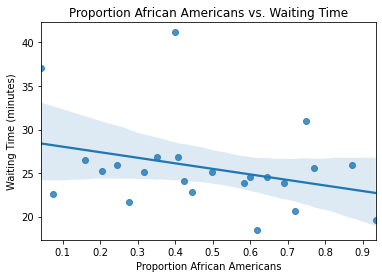

In [7]:
import seaborn as sns
fig=sns.regplot(x='Prop_Black',y='Difference', data=high_race)
fig.set_xlabel('Proportion African Americans')
fig.set_ylabel('Waiting Time (minutes)')
fig.set_title('Proportion African Americans vs. Waiting Time')

Text(0.5, 1.0, 'Proportion of African Americans vs Total Cancelled Trips')

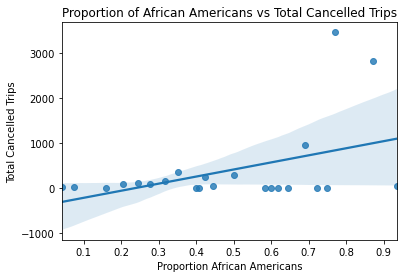

In [8]:
fig=sns.regplot(x='Prop_Black',y='cancelled', data=high_race)
fig.set_xlabel('Proportion African Americans')
fig.set_ylabel('Total Cancelled Trips')
fig.set_title('Proportion of African Americans vs Total Cancelled Trips')

In [35]:

sns.regplot(x='Prop_Black',y='noDriversAvailable', data=high_race)

KeyError: 'noDriversAvailable'

In [ ]:
sns.regplot(x='POP_SQMI',y='noDriversAvailable', data=high_race)

<AxesSubplot:xlabel='POP_SQMI', ylabel='cancelled'>

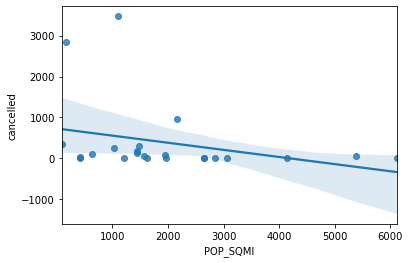

In [36]:
sns.regplot(x='POP_SQMI',y='cancelled', data=high_race)

Text(0.5, 1.0, 'Population vs. Waiting Time')

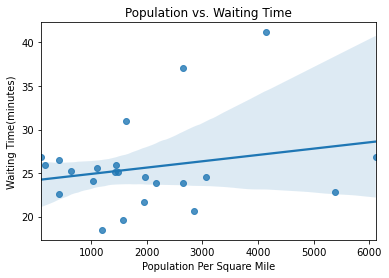

In [37]:
fig=sns.regplot(x='POP_SQMI',y='Difference', data=high_race)
fig.set_xlabel('Population Per Square Mile')
fig.set_ylabel('Waiting Time(minutes)')
fig.set_title('Population vs. Waiting Time')

In [38]:
x=high_race['Prop_Black']
y=high_race['cancelled']


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


AttributeError: 'JointGrid' object has no attribute 'set_title'

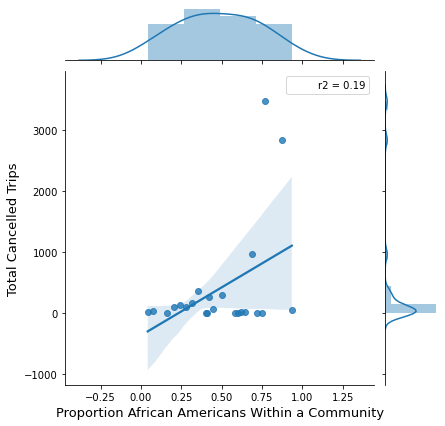

In [39]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
aax=sns.jointplot(x, y, kind="reg", stat_func=r2)
aax.set_axis_labels('Proportion African Americans Within a Community', 'Total Cancelled Trips', fontsize=13)

aax.set_title('Correlation between African American Communities and Trip Cancellations')

In [ ]:
#time series analysis of black ridership vs white ridership
clus1

In [40]:
#we need to make a new df with just daily ride count and date to make a rolling window 
clus1.requestedPickupTs=pd.to_datetime(clus1['requestedPickupTs'],unit='s')

ValueError: non convertible value 2020-04-22 11:40:35 with the unit 's'

In [41]:
clus1

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
23491   2020-04-22 11:40:35  2020-04-22 11:49:38                32.661913   
23492   2020-04-26 23:23:04  2020-04-26 23:31:14                32.660885   
23493   2019-08-06 23:39:32  2019-08-06 23:49:09                32.661035   
23494   2020-02-05 20:17:01  2020-02-05 20:26:24                32.660384   
23495   2020-02-25 23:51:17  2020-02-26 00:00:32                32.661016   
...                     ...                  ...                      ...   
272013  2019-06-18 18:26:17  2019-06-18 18:36:39                32.650085   
272014  2019-09-10 19:45:22  2019-09-10 19:55:18                32.650084   
272015  2019-09-10 19:48:43  2019-09-10 19:59:17                32.649851   
272016  2019-09-19 19:31:16  2019-09-19 19:46:12                32.650084   
272023  2019-09-30 21:14:35  2019-09-30 21:20:19                32.648356   

        requestedPickupLongitude  requestedDropoffLatitude  \
23491                 -96.734318                 32.654408   
23492                 -96.732461                 32.654084   
23493                 -96.736106                 32.654206   
23494                 -96.734498                 32.654408   
23495                 -96.736038                 32.653573   
...                          ...                       ...   
272013                -96.862347                 32.654206   
272014                -96.862349                 32.654408   
272015                -96.863107                 32.654206   
272016                -96.862349                 32.563522   
272023                -96.782220                 32.654408   

        requestedDropoffLongitude                             serviceId  \
23491                  -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
23492                  -96.801047  506997d2-b163-4b46-b977-b47f8fb0c4ff   
23493                  -96.801079  506997d2-b163-4b46-b977-b47f8fb0c4ff   
23494                  -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
23495                  -96.802496  506997d2-b163-4b46-b977-b47f8fb0c4ff   
...                           ...                                   ...   
272013                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
272014                 -96.801775  763b99ff-73bd-4821-a7bf-5617c267dca9   
272015                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
272016                 -96.837738  763b99ff-73bd-4821-a7bf-5617c267dca9   
272023                 -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   

           status  travelDistance  travelDuration  ...            completed  \
23491   cancelled            9305             543  ...  2019-04-03 11:44:26   
23492   completed            8737             490  ...  2020-03-06 14:30:25   
23493   cancelled            9572             577  ...                  NaN   
23494   completed            8497             563  ...  2019-11-25 13:19:57   
23495   completed            9461             555  ...  2020-07-01 16:06:22   
...           ...             ...             ...  ...                  ...   
272013  completed            6530             622  ...  2019-05-29 16:09:56   
272014  cancelled            6432             596  ...  2019-12-02 21:55:37   
272015  cancelled            6580             634  ...                  NaN   
272016  completed           14741             896  ...                  NaN   
272023  completed            3936             344  ...  2019-04-11 12:44:12   

                  cancelled  noDriversAvailable  serviceDisruption  \
23491                   NaN                 NaN                NaN   
23492                   NaN                 NaN                NaN   
23493   2019-09-27 22:31:38                 NaN                NaN   
23494                   NaN                 NaN                NaN   
23495                   NaN                 NaN                NaN   
...                     ...                 ...                ...   


In [42]:
clus1.requestedPickupTs = pd.to_datetime(clus1.requestedPickupTs, infer_datetime_format=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
clus2.requestedPickupTs = pd.to_datetime(clus2.requestedPickupTs, infer_datetime_format=True)

In [44]:
clus2_timeframe

NameError: name 'clus2_timeframe' is not defined

In [45]:
clus1_timeframe=pd.DataFrame(clus1.groupby(clus1.requestedPickupTs.dt.strftime('%Y-%B-%d'))['completed'].count())

In [46]:
clus2_timeframe=pd.DataFrame(clus2.groupby(clus2.requestedPickupTs.dt.strftime('%Y-%B-%d'))['completed'].count())

In [47]:
clus1_timeframe=clus1_timeframe.reset_index(drop=False)

In [48]:
clus2_timeframe=clus2_timeframe.reset_index(drop=False)

<AxesSubplot:xlabel='requestedPickupTs', ylabel='completed'>

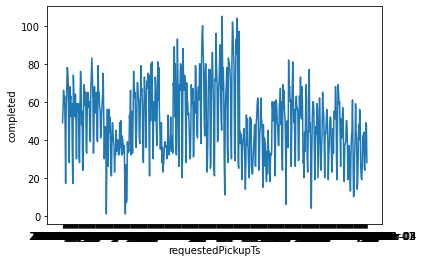

In [49]:
sns.lineplot(x='requestedPickupTs',y='completed',data=clus1_timeframe)

<AxesSubplot:xlabel='requestedPickupTs', ylabel='completed'>

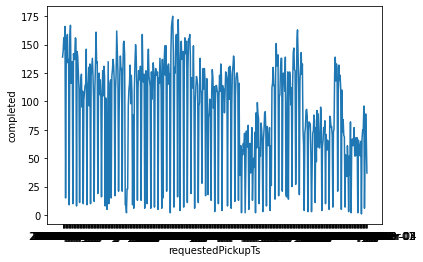

In [50]:
sns.lineplot(x='requestedPickupTs',y='completed',data=clus2_timeframe)

In [51]:
clus2

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
0      2020-04-21 17:34:19  2020-04-21 17:47:10                32.931741   
1      2019-09-23 13:00:00  2019-09-23 13:05:31                32.934094   
2      2019-08-06 21:30:00  2019-08-06 21:42:55                32.936103   
3      2019-04-03 11:28:17  2019-04-03 11:37:48                32.930262   
4      2019-04-03 11:56:11  2019-04-03 12:07:04                32.945021   
...                    ...                  ...                      ...   
271616 2020-01-22 20:51:00  2020-01-22 21:12:01                32.966538   
271617 2019-11-15 22:21:31  2019-11-15 22:42:01                32.966538   
271618 2019-12-04 20:08:16  2019-12-04 20:27:11                32.966538   
271619 2019-12-12 20:47:45  2019-12-12 21:08:46                32.966538   
272007 2020-03-21 00:42:22  2020-03-21 00:54:47                32.873333   

        requestedPickupLongitude  requestedDropoffLatitude  \
0                     -96.525914                 32.904062   
1                     -96.525330                 32.916508   
2                     -96.530935                 32.904062   
3                     -96.521496                 32.904062   
4                     -96.527977                 32.904128   
...                          ...                       ...   
271616                -96.526378                 32.904062   
271617                -96.526378                 32.904062   
271618                -96.526378                 32.904062   
271619                -96.526378                 32.904062   
272007                -96.520868                 32.919725   

        requestedDropoffLongitude                             serviceId  \
0                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
1                      -96.521620  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
2                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
3                      -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
4                      -96.563448  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
...                           ...                                   ...   
271616                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
271617                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
271618                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
271619                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
272007                 -96.510434  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   

           status  travelDistance  travelDuration  ...            completed  \
0       completed            7325             771  ...  2020-04-21 18:04:27   
1       completed            2742             331  ...                  NaN   
2       completed            6230             775  ...                  NaN   
3       completed            6751             571  ...                  NaN   
4       cancelled            6533             653  ...  2020-05-15 16:02:13   
...           ...             ...             ...  ...                  ...   
271616  cancelled            9822            1261  ...                  NaN   
271617  cancelled            9822            1230  ...  2019-09-16 12:17:55   
271618  completed            9822            1135  ...  2019-08-05 22:38:40   
271619  cancelled            9822            1261  ...                  NaN   
272007  cancelled            6147             745  ...                  NaN   

                  cancelled  noDriversAvailable  serviceDisruption  \
0                       NaN                 NaN                NaN   
1       2020-03-09 19:00:59                 NaN                NaN   
2       2019-05-08 02:29:54                 NaN                NaN   
3       2020-04-24 15:59:18                 NaN                NaN   
4                       NaN                 NaN                NaN   
...                     ...                 ...                ...   
271616  201

In [52]:
clus2_black=pd.DataFrame(clus2.groupby(df.FIPS)['Prop_Black'].median().sort_values(ascending=False))

In [53]:
clus2_rides=pd.DataFrame(clus2.groupby(df.FIPS)['completed'].count())

In [54]:
high_white=clus2_black.merge(clus2_rides,left_on='FIPS',right_on='FIPS')

In [55]:
whitest=clus2.loc[clus2.FIPS==481130181331]


In [56]:
blackest=clus1.loc[(clus1.FIPS==481130113001)]

In [57]:
blackest

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
61108 2020-04-22 23:50:00  2020-04-23 00:05:48                32.654408   
61109 2019-08-06 23:34:57  2019-08-06 23:45:34                32.653573   
61110 2020-04-22 12:30:00  2020-04-22 12:42:35                32.654408   
61111 2020-04-22 11:54:36  2020-04-22 12:06:38                32.654408   
61112 2019-09-29 23:07:04  2019-09-29 23:15:20                32.652741   
...                   ...                  ...                      ...   
76455 2020-04-26 23:39:00  2020-04-26 23:49:29                32.658543   
76456 2020-01-26 23:34:36  2020-01-26 23:42:48                32.652741   
76457 2019-09-29 23:16:13  2019-09-29 23:25:34                32.654408   
76458 2019-09-23 11:31:46  2019-09-23 11:41:08                32.654408   
76459 2019-08-06 18:27:21  2019-08-06 18:36:57                32.654408   

       requestedPickupLongitude  requestedDropoffLatitude  \
61108                -96.801775                 32.625396   
61109                -96.802496                 32.661016   
61110                -96.801775                 32.652512   
61111                -96.801775                 32.661913   
61112                -96.805225                 32.661035   
...                         ...                       ...   
76455                -96.803719                 32.661016   
76456                -96.805225                 32.661016   
76457                -96.801775                 32.661913   
76458                -96.801775                 32.661016   
76459                -96.801775                 32.661913   

       requestedDropoffLongitude                             serviceId  \
61108                 -96.763854  506997d2-b163-4b46-b977-b47f8fb0c4ff   
61109                 -96.736038  506997d2-b163-4b46-b977-b47f8fb0c4ff   
61110                 -96.743936  506997d2-b163-4b46-b977-b47f8fb0c4ff   
61111                 -96.734318  506997d2-b163-4b46-b977-b47f8fb0c4ff   
61112                 -96.736106  506997d2-b163-4b46-b977-b47f8fb0c4ff   
...                          ...                                   ...   
76455                 -96.736038  506997d2-b163-4b46-b977-b47f8fb0c4ff   
76456                 -96.736038  506997d2-b163-4b46-b977-b47f8fb0c4ff   
76457                 -96.734318  506997d2-b163-4b46-b977-b47f8fb0c4ff   
76458                 -96.736038  506997d2-b163-4b46-b977-b47f8fb0c4ff   
76459                 -96.734318  506997d2-b163-4b46-b977-b47f8fb0c4ff   

                   status  travelDistance  travelDuration  ...  \
61108           completed            8158             948  ...   
61109  noDriversAvailable           10138             637  ...   
61110           cancelled           10845             755  ...   
61111           completed            9472             722  ...   
61112           completed            9487             496  ...   
...                   ...             ...             ...  ...   
76455           completed            8921             629  ...   
76456           completed            9481             492  ...   
76457           completed            9689             561  ...   
76458           cancelled            9851             562  ...   
76459           completed            9689             576  ...   

                 completed            cancelled  noDriversAvailable  \
61108  2020-02-05 19:09:06                  NaN                 NaN   
61109                  NaN  2019-08-07 12:29:00                 NaN   
61110  2019-08-13 14:10:45                  NaN                 NaN   
61111  2020-02-21 14:00:44                  NaN                 NaN   
61112  2020-06-24 16:14:18                  NaN                 NaN   
...                    ...                  ...                 ...   
76455                  NaN  2019-01-17 14:00:37                 NaN   
76456  2019-03-25 22:26:07                  NaN                 NaN   
76457  2020-05-18 21:41:01                  NaN      

In [58]:
blackest_timeframe=pd.DataFrame(blackest.groupby(blackest.requestedPickupTs.dt.strftime('%Y-%B-%d'))['completed'].count())
whitest_timeframe=pd.DataFrame(whitest.groupby(whitest.requestedPickupTs.dt.strftime('%Y-%B-%d'))['completed'].count())

In [59]:
blackest_timeframe=blackest_timeframe.reset_index(drop=False)
whitest_timeframe=whitest_timeframe.reset_index(drop=False)

<AxesSubplot:xlabel='requestedPickupTs', ylabel='completed'>

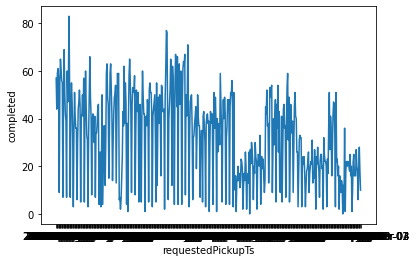

In [60]:
#sns.lineplot(x='requestedPickupTs',y='completed',data=blackest_timeframe)
sns.lineplot(x='requestedPickupTs',y='completed',data=whitest_timeframe)

In [61]:
clus1.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

In [62]:
interest=micro_census[['CBG','Total Occupied Units','Total Occupied Owner Units With Zero Vehicles','Total Occupied Rented Units With Zero Vehicles']]

In [63]:
interest['prop_zero_vehicles']=(interest['Total Occupied Owner Units With Zero Vehicles']+interest['Total Occupied Rented Units With Zero Vehicles'])/interest['Total Occupied Units']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
forbind=interest[['CBG','prop_zero_vehicles']]

In [65]:
income=micro_census[['CBG','Median household income']]

In [66]:
clus1=clus1.merge(forbind,left_on='FIPS',right_on='CBG')

In [67]:
clus0=clus0.merge(forbind,left_on='FIPS',right_on='CBG')

NameError: name 'clus0' is not defined

In [68]:
clus2=clus2.merge(forbind,left_on='FIPS',right_on='CBG')

In [69]:
blackest.requestedPickupTs = pd.to_datetime(blackest.requestedPickupTs, infer_datetime_format=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [70]:
blackest.dtypes

requestedPickupTs           datetime64[ns]
requestedDropoffTs                  object
requestedPickupLatitude            float64
requestedPickupLongitude           float64
requestedDropoffLatitude           float64
                                 ...      
Prop_White                         float64
Prop_Hispanic                      float64
Prop_Asian                         float64
Difference                         float64
clusters                             int64
Length: 73, dtype: object

In [135]:
test=Da[['requestedPickupLatitude','requestedPickupLongitude','requestedPickupTs']]


In [137]:
test.to_csv('geospatialtest.csv')

In [71]:
blackpre=blackest[(blackest['requestedPickupTs'] > '2019-01-28') & (blackest['requestedPickupTs'] < '2020-02-01')]
blackpost=blackest[(blackest['requestedPickupTs'] > '2020-02-01') ]
blackpre_timeframe=pd.DataFrame(blackpre.groupby(blackpre.requestedPickupTs.dt.strftime('%B'))['completed'].count())
blackpost_timeframe=pd.DataFrame(blackpost.groupby(blackpost.requestedPickupTs.dt.strftime('%B'))['completed'].count())
whitepre=whitest[(whitest['requestedPickupTs'] > '2019-01-17') & (whitest['requestedPickupTs'] < '2020-02-01')]
whitepost=whitest[(whitest['requestedPickupTs'] > '2020-02-01') ]
whitepre_timeframe=pd.DataFrame(whitepre.groupby(whitepre.requestedPickupTs.dt.strftime('%B'))['completed'].count())
whitepost_timeframe=pd.DataFrame(whitepost.groupby(whitepost.requestedPickupTs.dt.strftime('%B'))['completed'].count())
blackpre_timeframe=blackpre_timeframe.reset_index(drop=False)
blackpost_timeframe=blackpost_timeframe.reset_index(drop=False)
whitepre_timeframe=whitepre_timeframe.reset_index(drop=False)
whitepost_timeframe=whitepost_timeframe.reset_index(drop=False)

In [119]:
#blackpre_timeframe.drop((['requestedPickupTs']=='January','October','November','December'), axis=0)
indexNames = blackpre_timeframe[blackpre_timeframe['requestedPickupTs'] == 'January'].index
 
# Delete these row indexes from dataFrame
blackpre_timeframe.drop(indexNames , inplace=True)

In [121]:
#blackpre_timeframe.drop((['requestedPickupTs']=='January','October','November','December'), axis=0)
indexNames = blackpre_timeframe[blackpre_timeframe['requestedPickupTs'] == 'January'].index
 
# Delete these row indexes from dataFrame
blackpre_timeframe.drop(indexNames , inplace=True)
indexNames = blackpre_timeframe[blackpre_timeframe['requestedPickupTs'] == 'October'].index


blackpre_timeframe.drop(indexNames , inplace=True)
indexNames = blackpre_timeframe[blackpre_timeframe['requestedPickupTs'] == 'November'].index


blackpre_timeframe.drop(indexNames , inplace=True)

indexNames = blackpre_timeframe[blackpre_timeframe['requestedPickupTs'] == 'December'].index


blackpre_timeframe.drop(indexNames , inplace=True)

In [129]:
#blackpre_timeframe.drop((['requestedPickupTs']=='January','October','November','December'), axis=0)
indexNames = whitepre_timeframe[whitepre_timeframe['requestedPickupTs'] == 'January'].index
 
# Delete these row indexes from dataFrame
whitepre_timeframe.drop(indexNames , inplace=True)
indexNames = whitepre_timeframe[whitepre_timeframe['requestedPickupTs'] == 'October'].index


whitepre_timeframe.drop(indexNames , inplace=True)
indexNames = whitepre_timeframe[whitepre_timeframe['requestedPickupTs'] == 'November'].index


whitepre_timeframe.drop(indexNames , inplace=True)

indexNames = whitepre_timeframe[whitepre_timeframe['requestedPickupTs'] == 'December'].index


whitepre_timeframe.drop(indexNames , inplace=True)

In [124]:
blackpre_timeframe

requestedPickupTs  completed
3           February        542
7              March        679
0              April        620
8                May        662
6               June        727
5               July        593
1             August        550
11         September        671

In [107]:
blackpost_timeframe

requestedPickupTs  completed
2          February        555
5             March        580
0             April        520
6               May        452
4              June        498
3              July        567
1            August        473
7         September         64

In [125]:
blackpre_timeframe['requestedPickupTs'] = pd.Categorical(blackpre_timeframe['requestedPickupTs'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
blackpre_timeframe=blackpre_timeframe.sort_values(by='requestedPickupTs')
blackpost_timeframe['requestedPickupTs'] = pd.Categorical(blackpost_timeframe['requestedPickupTs'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
blackpost_timeframe=blackpost_timeframe.sort_values(by='requestedPickupTs')

In [130]:
whitepre_timeframe['requestedPickupTs'] = pd.Categorical(whitepre_timeframe['requestedPickupTs'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
whitepre_timeframe=whitepre_timeframe.sort_values(by='requestedPickupTs')
whitepost_timeframe['requestedPickupTs'] = pd.Categorical(whitepost_timeframe['requestedPickupTs'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
whitepost_timeframe=whitepost_timeframe.sort_values(by='requestedPickupTs')

In [127]:
import matplotlib.pyplot as plt

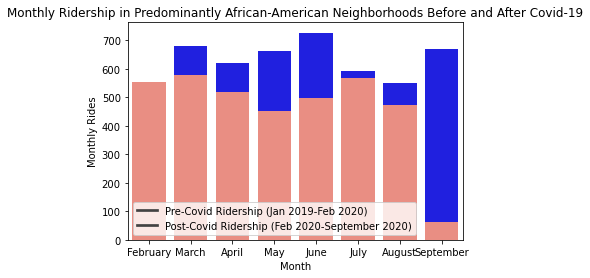

In [128]:
ax=sns.barplot(x='requestedPickupTs',y='completed',data=blackpre_timeframe,color="blue")
ax=sns.barplot(x='requestedPickupTs',y='completed',data=blackpost_timeframe,color='salmon')
ax.set_title('Monthly Ridership in Predominantly African-American Neighborhoods Before and After Covid-19')
ax.set_ylabel('Monthly Rides')
ax.set_xlabel('Month')
ax.legend(['Pre-Covid Ridership (Jan 2019-Feb 2020)','Post-Covid Ridership (Feb 2020-September 2020)'],loc="lower left")

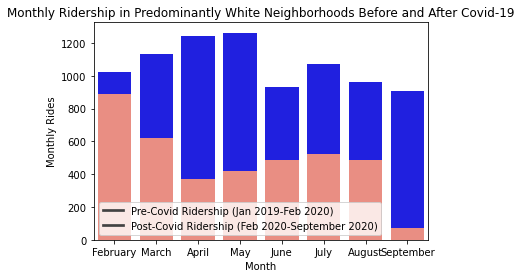

In [131]:
wax=sns.barplot(x='requestedPickupTs',y='completed',data=whitepre_timeframe,color="blue")
wax=sns.barplot(x='requestedPickupTs',y='completed',data=whitepost_timeframe,color='salmon')
wax.set_title('Monthly Ridership in Predominantly White Neighborhoods Before and After Covid-19')
wax.set_ylabel('Monthly Rides')
wax.set_xlabel('Month')
wax.legend(['Pre-Covid Ridership (Jan 2019-Feb 2020)','Post-Covid Ridership (Feb 2020-September 2020)'],loc="lower left")

In [75]:
whitepost_timeframe

requestedPickupTs  completed
0             April        369
1            August        488
2          February        892
3              July        525
4              June        487
5             March        618
6               May        417
7         September         75

In [76]:
low_race=

SyntaxError: invalid syntax (<ipython-input-76-6fb6dd5d469b>, line 1)

In [77]:
clus2_drive=pd.DataFrame(clus2.groupby(clus2.FIPS)['prop_zero_vehicles'].median().sort_values(ascending=False))
clus2_rides=pd.DataFrame(clus2.groupby(clus2.FIPS)['completed'].count())
rides_etc=clus2_rides.merge(clus2_drive,left_on='FIPS',right_on='FIPS')
clus2_whiteness=pd.DataFrame(clus2.groupby(clus2.FIPS)['Prop_White'].median())
rides_etc=rides_etc.merge(clus2_whiteness,left_on='FIPS',right_on='FIPS')
wait_time=pd.DataFrame(clus2.groupby(clus2.FIPS)['Difference'].median())
rides_etc=rides_etc.merge(wait_time,left_on='FIPS',right_on='FIPS')

rides_etc

completed  prop_zero_vehicles  Prop_White  Difference
FIPS                                                               
481130181221          5            0.014568    0.634772  735.750000
481130181241       1773            0.000000    0.641257   26.600000
481130181242       1935            0.000000    0.585723   25.583333
481130181243       2931            0.000000    0.613735   26.591667
481130181244        715            0.060386    0.635127   27.050000
481130181331      16018            0.023121    0.822416   26.283333
481130181332       1702            0.000000    0.711978   25.416667
481130181341       1223            0.000000    0.752777   25.316667
481130181342        208            0.000000    0.685606   24.400000
481130181343        745            0.000000    0.659647   22.516667
481130181351       3579            0.045045    0.669074   25.883333
481130181352       1969            0.016234    0.620438   25.166667
481130181361        162            0.055328    0.606978   25.875000
481130181362         82            0.000000    0.774661   34.850000
481130181363        165            0.035011    0.814687   23.408333
481130181364        159            0.000000    0.729304   25.966667
481130181365        157            0.000000    0.790970   23.258333
481130181391        457            0.000000    0.541703   25.291667
481130181392       1797            0.081818    0.679038   27.058333
481130181393         55            0.000000    0.589086   24.500000
481130181394       2429            0.095287    0.560281   25.700000
481130181401       1569            0.000000    0.679435   25.783333
481130181402        989            0.029141    0.698406   25.591667
481130181403        589            0.000000    0.551049   27.883333
481130181411          0            0.010101    0.601331         NaN
483970401021       1025            0.000000    0.720328   28.808333
483970403011       1188            0.000000    0.773241   25.466667
483970403012        335            0.027864    0.770661   23.683333
483970403013       1205            0.020175    0.753184   26.566667
483970405042         36            0.044898    0.764266   18.975000

Text(0.5, 1.0, 'Proportion Caucasians vs. Waiting Time')

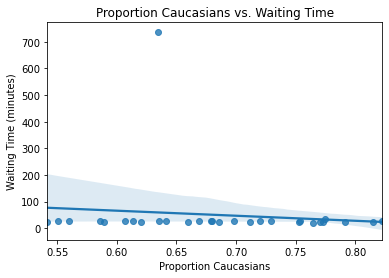

In [78]:
fig=sns.regplot(x='Prop_White',y='Difference', data=rides_etc)
fig.set_xlabel('Proportion Caucasians')
fig.set_ylabel('Waiting Time (minutes)')
fig.set_title('Proportion Caucasians vs. Waiting Time')

Text(0.5, 1.0, 'Proportion of Caucasians vs Completed Trips')

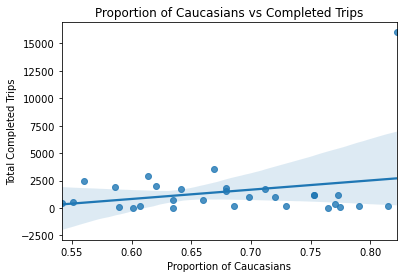

In [79]:
fig=sns.regplot(x='Prop_White',y='completed',data=rides_etc)
fig.set_xlabel('Proportion of Caucasians')
fig.set_ylabel('Total Completed Trips')
fig.set_title('Proportion of Caucasians vs Completed Trips')

In [80]:
clus1

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
0     2020-04-22 11:40:35  2020-04-22 11:49:38                32.661913   
1     2020-04-26 23:23:04  2020-04-26 23:31:14                32.660885   
2     2019-08-06 23:39:32  2019-08-06 23:49:09                32.661035   
3     2020-02-05 20:17:01  2020-02-05 20:26:24                32.660384   
4     2020-02-25 23:51:17  2020-02-26 00:00:32                32.661016   
...                   ...                  ...                      ...   
38804 2019-06-18 18:26:17  2019-06-18 18:36:39                32.650085   
38805 2019-09-10 19:45:22  2019-09-10 19:55:18                32.650084   
38806 2019-09-10 19:48:43  2019-09-10 19:59:17                32.649851   
38807 2019-09-19 19:31:16  2019-09-19 19:46:12                32.650084   
38808 2019-09-30 21:14:35  2019-09-30 21:20:19                32.648356   

       requestedPickupLongitude  requestedDropoffLatitude  \
0                    -96.734318                 32.654408   
1                    -96.732461                 32.654084   
2                    -96.736106                 32.654206   
3                    -96.734498                 32.654408   
4                    -96.736038                 32.653573   
...                         ...                       ...   
38804                -96.862347                 32.654206   
38805                -96.862349                 32.654408   
38806                -96.863107                 32.654206   
38807                -96.862349                 32.563522   
38808                -96.782220                 32.654408   

       requestedDropoffLongitude                             serviceId  \
0                     -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
1                     -96.801047  506997d2-b163-4b46-b977-b47f8fb0c4ff   
2                     -96.801079  506997d2-b163-4b46-b977-b47f8fb0c4ff   
3                     -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
4                     -96.802496  506997d2-b163-4b46-b977-b47f8fb0c4ff   
...                          ...                                   ...   
38804                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
38805                 -96.801775  763b99ff-73bd-4821-a7bf-5617c267dca9   
38806                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
38807                 -96.837738  763b99ff-73bd-4821-a7bf-5617c267dca9   
38808                 -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   

          status  travelDistance  travelDuration  ... noDriversAvailable  \
0      cancelled            9305             543  ...                NaN   
1      completed            8737             490  ...                NaN   
2      cancelled            9572             577  ...                NaN   
3      completed            8497             563  ...                NaN   
4      completed            9461             555  ...                NaN   
...          ...             ...             ...  ...                ...   
38804  completed            6530             622  ...                NaN   
38805  cancelled            6432             596  ...                NaN   
38806  cancelled            6580             634  ...                NaN   
38807  completed           14741             896  ...                NaN   
38808  completed            3936             344  ...                NaN   

       serviceDisruption  Prop_Black  Prop_White  Prop_Hispanic  Prop_Asian  \
0                    NaN    0.871241    0.065789       0.103383    0.006579   
1                    NaN    0.871241    0.065789       0.103383    0.006579   
2                    NaN    0.871241    0.065789       0.103383    0.006579   
3                    NaN    0.871241    0.065789       0.103383    0.006579   
4                    NaN    0.871241    0.065789       0.103383    0.006579   
...                  ...         ...         ...            ...         ...   
38804              

In [81]:
clus1_drive=pd.DataFrame(clus1.groupby(clus1.FIPS)['prop_zero_vehicles'].median().sort_values(ascending=False))
clus1_rides=pd.DataFrame(clus1.groupby(clus1.FIPS)['completed'].count())
rides_black=clus1_rides.merge(clus1_drive,left_on='FIPS',right_on='FIPS')
clus1_blackness=pd.DataFrame(clus1.groupby(clus1.FIPS)['Prop_Black'].median())
rides_black=rides_black.merge(clus1_blackness,left_on='FIPS',right_on='FIPS')
rides_income=pd.DataFrame(clus1.groupby(clus1.FIPS)['Median household income'].median())
rides_black=rides_black.merge(rides_income,left_on='FIPS',right_on='FIPS')

KeyError: 'Column not found: Median household income'

Text(0.5, 1.0, 'Proportion of African Americans vs Occupied Homes with no Vehicles')

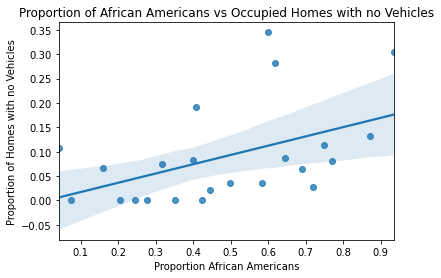

In [82]:
fig=sns.regplot(x='Prop_Black',y='prop_zero_vehicles',data=rides_black)
fig.set_xlabel('Proportion African Americans')
fig.set_ylabel('Proportion of Homes with no Vehicles')
fig.set_title('Proportion of African Americans vs Occupied Homes with no Vehicles')

Text(0.5, 1.0, 'Proportion of African Americans vs Completed Trips')

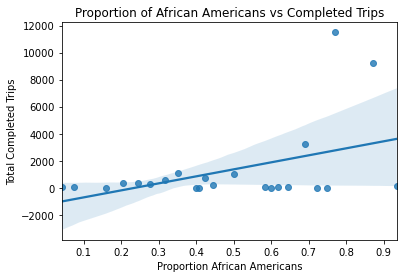

In [83]:
fig=sns.regplot(x='Prop_Black',y='completed',data=rides_black)
fig.set_xlabel('Proportion African Americans')
fig.set_ylabel('Total Completed Trips')
fig.set_title('Proportion of African Americans vs Completed Trips')

In [84]:
fig=sns.regplot(x='Median household income',y='completed',data=rides_black)
fig.set_xlabel('Median Income')
fig.set_ylabel('Total Completed Trips')
fig.set_title('Median Income vs Completed Trips')

KeyError: 'Median household income'

In [85]:
fig=sns.regplot(x='Prop_White',y='Median household income',data=clus1)
fig.set_xlabel('Proportion Caucasians ')
fig.set_ylabel('Median Income')
fig.set_title('Median Income vs Proportion of Caucasians')

KeyError: 'Median household income'

In [86]:
#way to quantiy loss of ridership by ethinicity within cluster1 and cluster2

clus1=clus1.merge(income,left_on='CBG',right_on='CBG')
clus1

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
0     2020-04-22 11:40:35  2020-04-22 11:49:38                32.661913   
1     2020-04-26 23:23:04  2020-04-26 23:31:14                32.660885   
2     2019-08-06 23:39:32  2019-08-06 23:49:09                32.661035   
3     2020-02-05 20:17:01  2020-02-05 20:26:24                32.660384   
4     2020-02-25 23:51:17  2020-02-26 00:00:32                32.661016   
...                   ...                  ...                      ...   
38804 2019-06-18 18:26:17  2019-06-18 18:36:39                32.650085   
38805 2019-09-10 19:45:22  2019-09-10 19:55:18                32.650084   
38806 2019-09-10 19:48:43  2019-09-10 19:59:17                32.649851   
38807 2019-09-19 19:31:16  2019-09-19 19:46:12                32.650084   
38808 2019-09-30 21:14:35  2019-09-30 21:20:19                32.648356   

       requestedPickupLongitude  requestedDropoffLatitude  \
0                    -96.734318                 32.654408   
1                    -96.732461                 32.654084   
2                    -96.736106                 32.654206   
3                    -96.734498                 32.654408   
4                    -96.736038                 32.653573   
...                         ...                       ...   
38804                -96.862347                 32.654206   
38805                -96.862349                 32.654408   
38806                -96.863107                 32.654206   
38807                -96.862349                 32.563522   
38808                -96.782220                 32.654408   

       requestedDropoffLongitude                             serviceId  \
0                     -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
1                     -96.801047  506997d2-b163-4b46-b977-b47f8fb0c4ff   
2                     -96.801079  506997d2-b163-4b46-b977-b47f8fb0c4ff   
3                     -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   
4                     -96.802496  506997d2-b163-4b46-b977-b47f8fb0c4ff   
...                          ...                                   ...   
38804                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
38805                 -96.801775  763b99ff-73bd-4821-a7bf-5617c267dca9   
38806                 -96.801079  763b99ff-73bd-4821-a7bf-5617c267dca9   
38807                 -96.837738  763b99ff-73bd-4821-a7bf-5617c267dca9   
38808                 -96.801775  506997d2-b163-4b46-b977-b47f8fb0c4ff   

          status  travelDistance  travelDuration  ... serviceDisruption  \
0      cancelled            9305             543  ...               NaN   
1      completed            8737             490  ...               NaN   
2      cancelled            9572             577  ...               NaN   
3      completed            8497             563  ...               NaN   
4      completed            9461             555  ...               NaN   
...          ...             ...             ...  ...               ...   
38804  completed            6530             622  ...               NaN   
38805  cancelled            6432             596  ...               NaN   
38806  cancelled            6580             634  ...               NaN   
38807  completed           14741             896  ...               NaN   
38808  completed            3936             344  ...               NaN   

       Prop_Black  Prop_White  Prop_Hispanic  Prop_Asian  Difference  \
0        0.871241    0.065789       0.103383    0.006579    9.966667   
1        0.871241    0.065789       0.103383    0.006579   86.783333   
2        0.871241    0.065789       0.103383    0.006579         NaN   
3        0.871241    0.065789       0.103383    0.006579   14.116667   
4        0.871241    0.065789       0.103383    0.006579   12.133333   
...           ...         ...            ...         ...         ...   
38804    0.720441    0.090658       0.128576    0.005860   22.983333   
38805   

In [87]:
clus2=clus2.merge(income,left_on='CBG',right_on='CBG')
clus2

requestedPickupTs   requestedDropoffTs  requestedPickupLatitude  \
0     2020-04-21 17:34:19  2020-04-21 17:47:10                32.931741   
1     2019-09-23 13:00:00  2019-09-23 13:05:31                32.934094   
2     2019-08-06 21:30:00  2019-08-06 21:42:55                32.936103   
3     2019-04-03 11:28:17  2019-04-03 11:37:48                32.930262   
4     2019-04-03 11:56:11  2019-04-03 12:07:04                32.945021   
...                   ...                  ...                      ...   
60601 2020-01-22 20:51:00  2020-01-22 21:12:01                32.966538   
60602 2019-11-15 22:21:31  2019-11-15 22:42:01                32.966538   
60603 2019-12-04 20:08:16  2019-12-04 20:27:11                32.966538   
60604 2019-12-12 20:47:45  2019-12-12 21:08:46                32.966538   
60605 2020-03-21 00:42:22  2020-03-21 00:54:47                32.873333   

       requestedPickupLongitude  requestedDropoffLatitude  \
0                    -96.525914                 32.904062   
1                    -96.525330                 32.916508   
2                    -96.530935                 32.904062   
3                    -96.521496                 32.904062   
4                    -96.527977                 32.904128   
...                         ...                       ...   
60601                -96.526378                 32.904062   
60602                -96.526378                 32.904062   
60603                -96.526378                 32.904062   
60604                -96.526378                 32.904062   
60605                -96.520868                 32.919725   

       requestedDropoffLongitude                             serviceId  \
0                     -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
1                     -96.521620  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
2                     -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
3                     -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
4                     -96.563448  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
...                          ...                                   ...   
60601                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
60602                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
60603                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
60604                 -96.564146  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   
60605                 -96.510434  d0a57efd-e2cc-4a03-9ae6-fef917a74b76   

          status  travelDistance  travelDuration  ... serviceDisruption  \
0      completed            7325             771  ...               NaN   
1      completed            2742             331  ...               NaN   
2      completed            6230             775  ...               NaN   
3      completed            6751             571  ...               NaN   
4      cancelled            6533             653  ...               NaN   
...          ...             ...             ...  ...               ...   
60601  cancelled            9822            1261  ...               NaN   
60602  cancelled            9822            1230  ...               NaN   
60603  completed            9822            1135  ...               NaN   
60604  cancelled            9822            1261  ...               NaN   
60605  cancelled            6147             745  ...               NaN   

       Prop_Black  Prop_White  Prop_Hispanic  Prop_Asian   Difference  \
0        0.162095    0.585723       0.144638    0.064838    14.683333   
1        0.162095    0.585723       0.144638    0.064838          NaN   
2        0.162095    0.585723       0.144638    0.064838          NaN   
3        0.162095    0.585723       0.144638    0.064838          NaN   
4        0.162095    0.585723       0.144638    0.064838    26.166667   
...           ...         ...            ...         ...          ...   
60601    0.047072    0.634772       0.133091    0.061502          NaN   


In [88]:
whitepre_timeframe

requestedPickupTs  completed
0              April       1246
1             August        960
2           December        825
3           February       1026
4            January       1101
5               July       1072
6               June        929
7              March       1132
8                May       1263
9           November        785
10           October        899
11         September        909

In [89]:
whitepost_timeframe

requestedPickupTs  completed
0             April        369
1            August        488
2          February        892
3              July        525
4              June        487
5             March        618
6               May        417
7         September         75

In [90]:
blackpre_timeframe

requestedPickupTs  completed
0              April        620
1             August        550
2           December        593
3           February        542
4            January        736
5               July        593
6               June        727
7              March        679
8                May        662
9           November        715
10           October        705
11         September        671

In [91]:
blackpost_timeframe

requestedPickupTs  completed
0             April        520
1            August        473
2          February        555
3              July        567
4              June        498
5             March        580
6               May        452
7         September         64

In [92]:
merged=blackpre_timeframe.merge(blackpost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
merged['loss']=(1-(merged['completed_y']/merged['completed_x']))*100

In [93]:
merged

requestedPickupTs  completed_x  completed_y       loss
0             April          620          520  16.129032
1            August          550          473  14.000000
2          February          542          555  -2.398524
3              July          593          567   4.384486
4              June          727          498  31.499312
5             March          679          580  14.580265
6               May          662          452  31.722054
7         September          671           64  90.461997

In [94]:
funstuff=merged[['requestedPickupTs','completed_x']]

In [95]:
funstuff['return'] = funstuff['completed_x'].div(funstuff['completed_x'].shift(1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
funstuff
funstuff['requestedPickupTs'] = pd.Categorical(funstuff['requestedPickupTs'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
funstuff=funstuff.sort_values(by='requestedPickupTs')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
funstuff=funstuff.dropna()

In [98]:
funstuff

requestedPickupTs  completed_x    return
2          February          542  0.985455
5             March          679  0.933975
6               May          662  0.974963
4              June          727  1.225970
3              July          593  1.094096
1            August          550  0.887097
7         September          671  1.013595

In [99]:
seniors=pd.read_csv('seniortran.csv')

In [645]:
seniors

Unnamed: 0 requestedPickupTs  completed    return
0           4               May        100  2.439024
1           3              June        101  1.010000
2           2              July        148  1.465347
3           1            August        152  1.027027
4           6         September        160  1.052632
5           5           October          2  0.012500

In [648]:
funstuff=funstuff.merge(seniors,left_on='requestedPickupTs',right_on='requestedPickupTs')

In [669]:
funstuff=funstuff.set_index('requestedPickupTs')


In [675]:
funstuff=funstuff.drop(['completed','completed_x'],axis=1)

In [676]:
funstuff.drop(funstuff.columns[funstuff.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [677]:
funstuff

return_x  return_y
requestedPickupTs                    
May                1.067742  2.439024
June               1.098187  1.010000
July               0.815681  1.465347
August             0.927487  1.027027
September          1.220000  1.052632

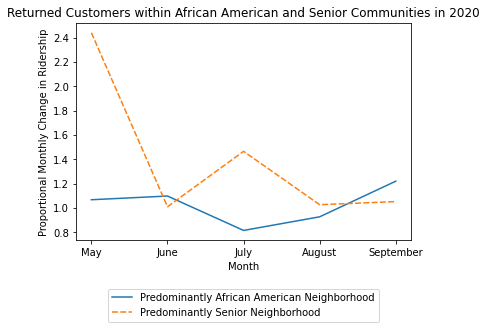

In [680]:
ax=sns.lineplot(data=funstuff,sort=False)

ax.set_ylabel('Proportional Monthly Change in Ridership')
ax.set_xlabel('Month')
ax.set_title('Returned Customers within African American and Senior Communities in 2020')
ax.legend(['Predominantly African American Neighborhood', 'Predominantly Senior Neighborhood'],loc="upper center",bbox_to_anchor=(0.5,-0.2))


In [510]:
merged=blackpre_timeframe.merge(blackpost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
merged['loss']=(1-(merged['completed_y']/merged['completed_x']))*100
blackchange=merged[['requestedPickupTs','loss']]
wmerged=whitepre_timeframe.merge(whitepost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
wmerged['loss']=(1-(wmerged['completed_y']/wmerged['completed_x']))*100
whitechange=wmerged[['requestedPickupTs','loss']]
ridershiploss=whitechange.merge(blackchange,left_on='requestedPickupTs',right_on='requestedPickupTs')
ridershiploss.columns = ['month','Predominantly White Ridership Loss', 'Predominantly African American Ridership Loss']
ridershiploss['month'] = pd.Categorical(ridershiploss['month'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
ridershiploss.sort_values(by='month')
ridershiploss=ridershiploss.set_index('month')
ax=sns.lineplot(x=ridershiploss.index,y='Predominantly White Ridership Loss',data=ridershiploss)
ax=sns.lineplot(x=ridershiploss.index,y='Predominantly African American Ridership Loss',data=ridershiploss)
ax.legend(['Predominantly Caucasian Neighborhood', 'Predominantly African American Neighborhood'])
ax.set_ylabel('Percent Loss')
ax.set_title('Ridership Loss During COVID-19 between African American and Caucasian Communities')

In [511]:
blackchange

requestedPickupTs       loss
0             April  16.129032
1            August  14.000000
2          February  -2.398524
3              July   4.384486
4              June  31.499312
5             March  14.580265
6               May  31.722054
7         September  90.461997

In [512]:
wmerged=whitepre_timeframe.merge(whitepost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
wmerged['loss']=(1-(wmerged['completed_y']/wmerged['completed_x']))*100

In [513]:
whitechange=wmerged[['requestedPickupTs','loss']]

In [514]:
ridershiploss=whitechange.merge(blackchange,left_on='requestedPickupTs',right_on='requestedPickupTs')

In [515]:
ridershiploss.dtypes

requestedPickupTs     object
loss_x               float64
loss_y               float64
dtype: object

In [516]:
ridershiploss.columns = ['month','Predominantly White Ridership Loss', 'Predominantly African American Ridership Loss']

In [519]:
from pandas.api.types import CategoricalDtype

In [ ]:
from pandas.api.types import CategoricalDtype

In [522]:
ridershiploss['month'] = pd.Categorical(ridershiploss['month'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
ridershiploss.sort_values(by='month')

month  Predominantly White Ridership Loss  \
2   February                           13.060429   
5      March                           45.406360   
0      April                           70.385233   
6        May                           66.983373   
4       June                           47.578041   
3       July                           51.026119   
1     August                           49.166667   
7  September                           91.749175   

   Predominantly African American Ridership Loss  
2                                      -2.398524  
5                                      14.580265  
0                                      16.129032  
6                                      31.722054  
4                                      31.499312  
3                                       4.384486  
1                                      14.000000  
7                                      90.461997

In [523]:
ridershiploss=ridershiploss.set_index('month')

Text(0.5, 1.0, 'Ridership Loss During COVID-19 between African American and Caucasian Communities')

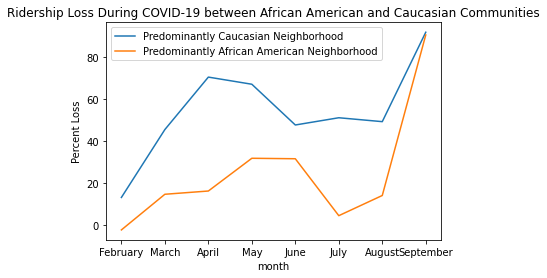

In [524]:
ax=sns.lineplot(x=ridershiploss.index,y='Predominantly White Ridership Loss',data=ridershiploss)
ax=sns.lineplot(x=ridershiploss.index,y='Predominantly African American Ridership Loss',data=ridershiploss)
ax.legend(['Predominantly Caucasian Neighborhood', 'Predominantly African American Neighborhood'])
ax.set_ylabel('Percent Loss')
ax.set_title('Ridership Loss During COVID-19 between African American and Caucasian Communities')

In [525]:
minni=pd.read_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/swtran_clusters.csv')

In [527]:

minni.drop(minni.columns[minni.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [540]:
minni.columns

Index(['GEOID', 'requestedPickupTs', 'requestedDropoffTs',
       'requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude', 'serviceId',
       'status', 'statusChanges', 'travelDistance', 'travelDuration',
       'endpoint', 'CBG', 'WhitePop', 'TotalPop', 'NonWhitePop',
       'ProportionNonWhite', 'TotalPopAged25+', ' 6Th Grade', ' 7Th Grade',
       ' 8Th Grade', ' 9Th Grade', ' 10Th Grade', ' 11Th Grade',
       ' 12Th Grade, No Diploma', ' Regular High School Diploma',
       ' Ged Or Alternative Credential', 'ProportionHighSchoolEducatedOrLess',
       'Median household income', 'Total Occupied Units',
       'Total Occupied Owner Units With Zero Vehicles',
       'Total Occupied Rented Units With Zero Vehicles',
       'ProportionOfZeroCarHouseholds', 'TotalPopWhoseIncomeWasAssessed',
       'PopBelowPovertyLevel', 'ProportionBelowPovertyLevel', 'processing',
       'accepted', 'arriving', 'inProgress', 'Difference', '

In [539]:
sw_black=pd.DataFrame(minni.groupby(minni.GEOID)['Prop_minority'].median().sort_values(ascending=False))
sw_wait=pd.DataFrame(minni.groupby(minni.GEOID)['Difference'].median().sort_values(ascending=False))

sw_population=pd.DataFrame(minni.groupby(minni.GEOID)['TotalPop'].median())
swhigh_race=sw_black.merge(sw_wait,left_on='GEOID',right_on='GEOID')

swhigh_race=swhigh_race.merge(sw_population,left_on='GEOID',right_on='GEOID')

swhigh_race.sort_values(by='Prop_minority', ascending=False)

Prop_minority  Difference  TotalPop
GEOID                                           
27053026019       0.490497   12.091667      1368
27139080302       0.451675   26.200000      5194
27053026018       0.353173   18.341667      3041
27053025701       0.318830   37.658333      1333
27053024005       0.300094   28.200000      1063
27053026005       0.272189   14.250000       845
27053025605       0.267176   23.900000       917
27053026020       0.234463   12.700000      1770
27053026022       0.203306   16.716667      4235
27053026208       0.196970   44.400000      1254
27053025905       0.179543   13.683333       919
27053025603       0.172878   21.950000       966
27019090702       0.165966   17.650000      1904
27019090601       0.155556   14.683333      1575
27019090502       0.143168   16.083333      3213
27053026104       0.141697   21.133333      1355
27019090701       0.137726   16.308333      3369
27053026007       0.133333   14.883333      2400
27019091100       0.126020   20.850000      4904
27053023902       0.120805   18.583333       894
27053026021       0.119461   14.925000      1557
27053026013       0.110270   15.583333       925
27053026016       0.102753   14.816667      2034
27019090301       0.096141   37.416667      1477
27019090800       0.094180   16.116667      1890
27053024003       0.078182   22.808333      1650
27053024004       0.075962   16.775000      1040
27019090503       0.071142   18.233333       998
27053026202       0.059983   18.633333      1167
27019090401       0.052043   25.750000      2594
27019090602       0.050599   25.041667      1502
27019090501       0.043020   27.900000      2371
27053026014       0.037565   15.133333      1544
27019091000       0.036090   17.833333       665
27053026006       0.032407   12.950000       648
27053026015       0.031966   13.300000      1658
27019090402       0.023904   23.416667      1255
27053027504       0.023256   26.975000       731
27019090900       0.012004   15.000000      1083

In [551]:
sw_drive=pd.DataFrame(minni.groupby(minni.GEOID)['ProportionOfZeroCarHouseholds'].median().sort_values(ascending=False))
df11=minni.groupby('GEOID')['status'].apply(lambda x: (x=='completed').sum()).reset_index(name='completed')
df11=df11.set_index('GEOID')
swrides_income=pd.DataFrame(minni.groupby(minni.GEOID)['Median household income'].median())


In [554]:
swhigh_race=swhigh_race.merge(sw_drive,left_on=swhigh_race.index,right_on=sw_drive.index)

In [564]:
swhigh_race=swhigh_race.merge(df11,left_on=swhigh_race.GEOID,right_on=df11.index)

In [568]:
swhigh_race=swhigh_race.merge(swrides_income,left_on=swhigh_race.GEOID,right_on=swrides_income.index)

In [562]:
swhigh_race=swhigh_race.rename(columns={'key_0': "GEOID"})


In [570]:
swhigh_race=swhigh_race.drop('key_0',axis=1)

In [572]:
swhigh_race.to_csv('for_graphsw.csv')

In [573]:
swhigh_race


GEOID  Prop_minority  Difference  TotalPop  \
0   27053026019       0.490497   12.091667      1368   
1   27139080302       0.451675   26.200000      5194   
2   27053026018       0.353173   18.341667      3041   
3   27053025701       0.318830   37.658333      1333   
4   27053024005       0.300094   28.200000      1063   
5   27053026005       0.272189   14.250000       845   
6   27053025605       0.267176   23.900000       917   
7   27053026020       0.234463   12.700000      1770   
8   27053026022       0.203306   16.716667      4235   
9   27053026208       0.196970   44.400000      1254   
10  27053025905       0.179543   13.683333       919   
11  27053025603       0.172878   21.950000       966   
12  27019090702       0.165966   17.650000      1904   
13  27019090601       0.155556   14.683333      1575   
14  27019090502       0.143168   16.083333      3213   
15  27053026104       0.141697   21.133333      1355   
16  27019090701       0.137726   16.308333      3369   
17  27053026007       0.133333   14.883333      2400   
18  27019091100       0.126020   20.850000      4904   
19  27053023902       0.120805   18.583333       894   
20  27053026021       0.119461   14.925000      1557   
21  27053026013       0.110270   15.583333       925   
22  27053026016       0.102753   14.816667      2034   
23  27019090301       0.096141   37.416667      1477   
24  27019090800       0.094180   16.116667      1890   
25  27053024003       0.078182   22.808333      1650   
26  27053024004       0.075962   16.775000      1040   
27  27019090503       0.071142   18.233333       998   
28  27053026202       0.059983   18.633333      1167   
29  27019090401       0.052043   25.750000      2594   
30  27019090602       0.050599   25.041667      1502   
31  27019090501       0.043020   27.900000      2371   
32  27053026014       0.037565   15.133333      1544   
33  27019091000       0.036090   17.833333       665   
34  27053026006       0.032407   12.950000       648   
35  27053026015       0.031966   13.300000      1658   
36  27019090402       0.023904   23.416667      1255   
37  27053027504       0.023256   26.975000       731   
38  27019090900       0.012004   15.000000      1083   

    ProportionOfZeroCarHouseholds  completed  Median household income  
0                        3.878583      16176                  67083.0  
1                        2.206674          1                  73147.0  
2                        0.000000       2231                 151513.0  
3                        0.000000          4                  74327.0  
4                       10.987261        125                  53788.0  
5                        9.428571        993                  61591.0  
6                        4.966140         11                  55339.0  
7                       20.996441       6442                  72107.0  
8                        0.000000       1149                 161431.0  
9                        2.092050          1                  71000.0  
10                       0.000000         75                 112639.0  
11                       4.559271         17                  51518.0  
12                       1.063830        417                 127188.0  
13                       7.555556       3867                  60708.0  
14                       0.000000        543                 136087.0  
15                       0.000000          1                  92237.0  
16                       0.000000       3584                 113158.0  
17                       3.146853       6390                  62308.0  
18                       2.743142       1040                 115651.0  
19                       3.767123         36                 144844.0  
20                       0.000000        561                 193542.0  
21                       0.000000        778                  85069.0  
22                       0.000000       2618                 105455.0  
23                       0.836820        

Text(0, 0.5, 'Total Rides Completed')

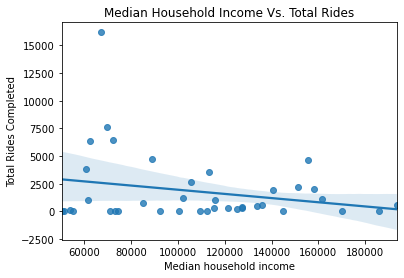

In [578]:
fig=sns.regplot(x='Median household income',y='completed',data=swhigh_race)
fig.set_title('Median Household Income Vs. Total Rides')
fig.set_ylabel('Total Rides Completed')

Text(0.5, 0, 'Proportion of Minorities to Population')

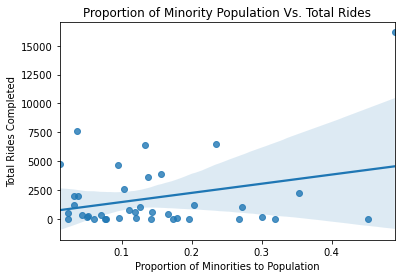

In [581]:
fig=sns.regplot(x='Prop_minority',y='completed',data=swhigh_race)
fig.set_title('Proportion of Minority Population Vs. Total Rides')
fig.set_ylabel('Total Rides Completed')
fig.set_xlabel('Proportion of Minorities to Population')

Text(0.5, 0, 'Median Income')

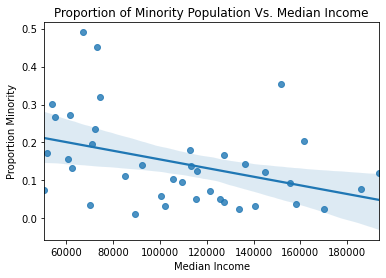

In [625]:
fig=sns.regplot(x='Median household income',y='Prop_minority',data=swhigh_race)
fig.set_title('Proportion of Minority Population Vs. Median Income')
fig.set_ylabel('Proportion Minority')
fig.set_xlabel('Median Income')

Text(0.5, 0, 'Median Income')

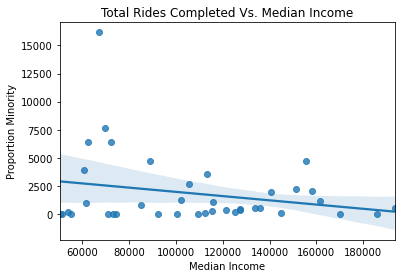

In [629]:
fig=sns.regplot(x='Median household income',y='completed',data=swhigh_race)
fig.set_title('Total Rides Completed Vs. Median Income')
fig.set_ylabel('Proportion Minority')
fig.set_xlabel('Median Income')

In [630]:
x=swhigh_race['Median household income']
y=swhigh_race['Prop_minority']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


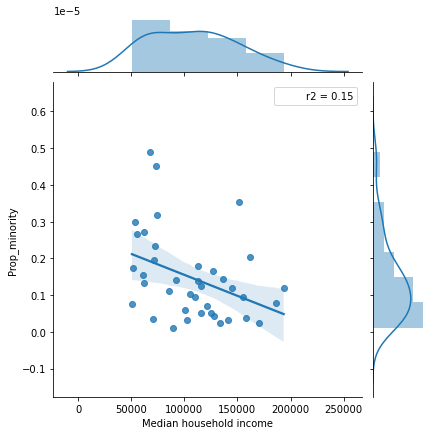

In [631]:
aax=sns.jointplot(x, y, kind="reg", stat_func=r2)


In [591]:
minni.requestedPickupTs = pd.to_datetime(minni.requestedPickupTs, infer_datetime_format=True)

In [598]:
from pandas import json_normalize

In [602]:
minni=minni.drop(['processing', 'accepted', 'arriving', 'inProgress'],axis=1)

In [603]:

B=json_normalize(minni['statusChanges'].apply(list_of_dicts).tolist())
minni=minni.join(B)

In [604]:
swblack=minni.loc[(minni.GEOID==27053026019)]
swwhite=minni.loc[(minni.GEOID==27019090900)|(minni.GEOID==27019090402)|(minni.GEOID==27053026015)|(minni.GEOID==27053026014)|(minni.GEOID==27019090501)]

In [611]:
swblackpre

GEOID   requestedPickupTs   requestedDropoffTs  \
50721  27053026019 2020-01-30 17:57:10  2020-01-30 18:09:11   
50725  27053026019 2020-01-14 21:37:54  2020-01-14 21:43:26   
50726  27053026019 2019-09-17 17:59:52  2019-09-17 18:04:50   
50727  27053026019 2019-10-11 17:56:50  2019-10-11 18:01:46   
50728  27053026019 2019-09-23 23:11:55  2019-09-23 23:15:40   
...            ...                 ...                  ...   
70184  27053026019 2019-09-05 14:08:18  2019-09-05 14:12:29   
70185  27053026019 2019-09-13 14:15:38  2019-09-13 14:22:37   
70186  27053026019 2019-08-27 14:14:44  2019-08-27 14:18:55   
70187  27053026019 2019-11-08 15:43:55  2019-11-08 15:48:06   
70188  27053026019 2019-08-29 16:20:53  2019-08-29 16:28:49   

       requestedPickupLatitude  requestedPickupLongitude  \
50721                44.858633                -93.442951   
50725                44.858640                -93.443029   
50726                44.858644                -93.442442   
50727                44.858648                -93.442597   
50728                44.858654                -93.442502   
...                        ...                       ...   
70184                44.850337                -93.451333   
70185                44.850337                -93.451333   
70186                44.850337                -93.451333   
70187                44.850337                -93.451333   
70188                44.850337                -93.451333   

       requestedDropoffLatitude  requestedDropoffLongitude  \
50721                 44.822201                 -93.484516   
50725                 44.844959                 -93.443038   
50726                 44.863267                 -93.460722   
50727                 44.863267                 -93.460722   
50728                 44.848572                 -93.424572   
...                         ...                        ...   
70184                 44.856234                 -93.463440   
70185                 44.868680                 -93.453069   
70186                 44.856234                 -93.463440   
70187                 44.856234                 -93.463440   
70188                 44.855558                 -93.424603   

                                  serviceId     status  \
50721  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
50725  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
50726  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
50727  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
50728  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
...                                     ...        ...   
70184  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70185  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70186  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70187  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70188  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   

                                           statusChanges  ...  Prop_minority  \
50721  [{"ts": 1580407030, "status": "processing"}, {...  ...       0.490497   
50725  [{"ts": 1579037874, "status": "processing"}, {...  ...       0.490497   
50726  [{"ts": 1568743192, "status": "processing"}, {...  ...       0.490497   
50727  [{"ts": 1570816610, "status": "processing"}, {...  ...       0.490497   
50728  [{"ts": 1569280315, "status": "processing"}, {...  ...       0.490497   
...                                                  ...  ...            ...   
70184  [{"ts": 1567692499, "status": "processing"}, {...  ...       0.490497   
70185  [{"ts": 1568384138, "status": "processing"}, {...  ...       0.490497   
70186  [{"ts": 1566915284, "status": "processing"}, {...  ...       0.490497   
70187  [{"ts": 1573227835, "status": "processing"}, {...  ...       0.490497   
70188  [{"ts": 1567095653, "status": "processing"}, {...  ...       0.490497   

       Prop_white  processing      accepted      arriving     cancelled  \
50721    0.509503  1580407030  1.580407e+09           NaN

In [615]:
swblackpre=swblack[(swblack['requestedPickupTs'] > '2019-08-10') & (swblack['requestedPickupTs'] < '2020-02-01')]
swblackpost=swblack[(swblack['requestedPickupTs'] > '2020-02-01') ]
swblackpre_timeframe=pd.DataFrame(swblackpre.groupby(swblackpre.requestedPickupTs.dt.strftime('%B'))['completed'].count())
swblackpost_timeframe=pd.DataFrame(swblackpost.groupby(swblackpost.requestedPickupTs.dt.strftime('%B'))['completed'].count())
swwhitepre=swwhite[(swwhite['requestedPickupTs'] > '2019-08-10') & (swwhite['requestedPickupTs'] < '2020-02-01')]
swwhitepost=swwhite[(swwhite['requestedPickupTs'] > '2020-02-01') ]
swwhitepre_timeframe=pd.DataFrame(swwhitepre.groupby(swwhitepre.requestedPickupTs.dt.strftime('%B'))['completed'].count())
swwhitepost_timeframe=pd.DataFrame(swwhitepost.groupby(swwhitepost.requestedPickupTs.dt.strftime('%B'))['completed'].count())
swblackpre_timeframe=swblackpre_timeframe.reset_index(drop=False)
swblackpost_timeframe=swblackpost_timeframe.reset_index(drop=False)
swwhitepre_timeframe=swwhitepre_timeframe.reset_index(drop=False)
swwhitepost_timeframe=swwhitepost_timeframe.reset_index(drop=False)

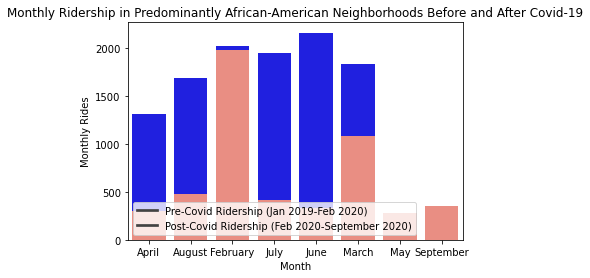

In [618]:
ax=sns.barplot(x='requestedPickupTs',y='completed',data=swblackpre_timeframe,color="blue")
ax=sns.barplot(x='requestedPickupTs',y='completed',data=swblackpost_timeframe,color='salmon')
ax.set_title('Monthly Ridership in Predominantly African-American Neighborhoods Before and After Covid-19')
ax.set_ylabel('Monthly Rides')
ax.set_xlabel('Month')
ax.legend(['Pre-Covid Ridership (Jan 2019-Feb 2020)','Post-Covid Ridership (Feb 2020-September 2020)'],loc="lower left")

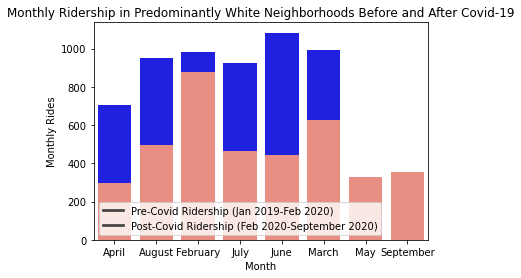

In [609]:
wax=sns.barplot(x='requestedPickupTs',y='completed',data=swwhitepre_timeframe,color="blue")
wax=sns.barplot(x='requestedPickupTs',y='completed',data=swwhitepost_timeframe,color='salmon')
wax.set_title('Monthly Ridership in Predominantly White Neighborhoods Before and After Covid-19')
wax.set_ylabel('Monthly Rides')
wax.set_xlabel('Month')
wax.legend(['Pre-Covid Ridership (Jan 2019-Feb 2020)','Post-Covid Ridership (Feb 2020-September 2020)'],loc="lower left")

In [612]:
swblackpre=swblack[(swblack['requestedPickupTs'] > '2019-08-10') & (swblack['requestedPickupTs'] < '2020-02-01')]
swblackpost=swblack[(swblack['requestedPickupTs'] > '2020-02-01') ]
swblackpre_timeframe=pd.DataFrame(swblackpre.groupby(swblackpre.requestedPickupTs.dt.strftime('%B'))['completed'].count())
swblackpost_timeframe=pd.DataFrame(swblackpost.groupby(swblackpost.requestedPickupTs.dt.strftime('%B'))['completed'].count())

Empty DataFrame
Columns: [requestedPickupTs, completed]
Index: []

In [614]:
swblackpre

GEOID   requestedPickupTs   requestedDropoffTs  \
50721  27053026019 2020-01-30 17:57:10  2020-01-30 18:09:11   
50725  27053026019 2020-01-14 21:37:54  2020-01-14 21:43:26   
50726  27053026019 2019-09-17 17:59:52  2019-09-17 18:04:50   
50727  27053026019 2019-10-11 17:56:50  2019-10-11 18:01:46   
50728  27053026019 2019-09-23 23:11:55  2019-09-23 23:15:40   
...            ...                 ...                  ...   
70184  27053026019 2019-09-05 14:08:18  2019-09-05 14:12:29   
70185  27053026019 2019-09-13 14:15:38  2019-09-13 14:22:37   
70186  27053026019 2019-08-27 14:14:44  2019-08-27 14:18:55   
70187  27053026019 2019-11-08 15:43:55  2019-11-08 15:48:06   
70188  27053026019 2019-08-29 16:20:53  2019-08-29 16:28:49   

       requestedPickupLatitude  requestedPickupLongitude  \
50721                44.858633                -93.442951   
50725                44.858640                -93.443029   
50726                44.858644                -93.442442   
50727                44.858648                -93.442597   
50728                44.858654                -93.442502   
...                        ...                       ...   
70184                44.850337                -93.451333   
70185                44.850337                -93.451333   
70186                44.850337                -93.451333   
70187                44.850337                -93.451333   
70188                44.850337                -93.451333   

       requestedDropoffLatitude  requestedDropoffLongitude  \
50721                 44.822201                 -93.484516   
50725                 44.844959                 -93.443038   
50726                 44.863267                 -93.460722   
50727                 44.863267                 -93.460722   
50728                 44.848572                 -93.424572   
...                         ...                        ...   
70184                 44.856234                 -93.463440   
70185                 44.868680                 -93.453069   
70186                 44.856234                 -93.463440   
70187                 44.856234                 -93.463440   
70188                 44.855558                 -93.424603   

                                  serviceId     status  \
50721  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
50725  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
50726  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
50727  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
50728  089fdbc8-ef59-4f15-a169-f9ae78818ece  cancelled   
...                                     ...        ...   
70184  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70185  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70186  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70187  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   
70188  089fdbc8-ef59-4f15-a169-f9ae78818ece  completed   

                                           statusChanges  ...  Prop_minority  \
50721  [{"ts": 1580407030, "status": "processing"}, {...  ...       0.490497   
50725  [{"ts": 1579037874, "status": "processing"}, {...  ...       0.490497   
50726  [{"ts": 1568743192, "status": "processing"}, {...  ...       0.490497   
50727  [{"ts": 1570816610, "status": "processing"}, {...  ...       0.490497   
50728  [{"ts": 1569280315, "status": "processing"}, {...  ...       0.490497   
...                                                  ...  ...            ...   
70184  [{"ts": 1567692499, "status": "processing"}, {...  ...       0.490497   
70185  [{"ts": 1568384138, "status": "processing"}, {...  ...       0.490497   
70186  [{"ts": 1566915284, "status": "processing"}, {...  ...       0.490497   
70187  [{"ts": 1573227835, "status": "processing"}, {...  ...       0.490497   
70188  [{"ts": 1567095653, "status": "processing"}, {...  ...       0.490497   

       Prop_white  processing      accepted      arriving     cancelled  \
50721    0.509503  1580407030  1.580407e+09           NaN

In [623]:
swblackpre_timeframe

requestedPickupTs  completed
0            August       1311
1          December       1692
2           January       2020
3          November       1950
4           October       2159
5         September       1833

Text(0.5, 1.0, 'Ridership Loss During COVID-19 between African American and Caucasian Communities')

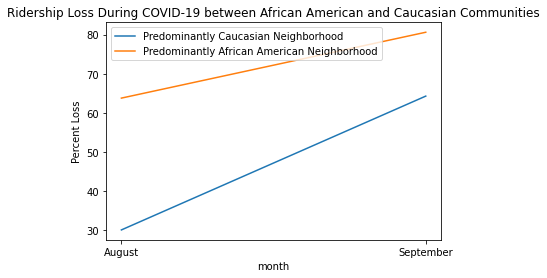

In [619]:
swmerged=swblackpre_timeframe.merge(swblackpost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
swmerged['loss']=(1-(swmerged['completed_y']/swmerged['completed_x']))*100
swblackchange=swmerged[['requestedPickupTs','loss']]
swwmerged=swwhitepre_timeframe.merge(swwhitepost_timeframe, left_on='requestedPickupTs',right_on='requestedPickupTs')
swwmerged['loss']=(1-(swwmerged['completed_y']/swwmerged['completed_x']))*100
swwhitechange=swwmerged[['requestedPickupTs','loss']]
swridershiploss=swwhitechange.merge(swblackchange,left_on='requestedPickupTs',right_on='requestedPickupTs')
swridershiploss.columns = ['month','Predominantly White Ridership Loss', 'Predominantly African American Ridership Loss']
swridershiploss['month'] = pd.Categorical(swridershiploss['month'], categories=['February','March','April','May','June','July','August','September'], ordered=True)
swridershiploss.sort_values(by='month')
swridershiploss=swridershiploss.set_index('month')
ax=sns.lineplot(x=swridershiploss.index,y='Predominantly White Ridership Loss',data=swridershiploss)
ax=sns.lineplot(x=swridershiploss.index,y='Predominantly African American Ridership Loss',data=swridershiploss)
ax.legend(['Predominantly Caucasian Neighborhood', 'Predominantly African American Neighborhood'])
ax.set_ylabel('Percent Loss')
ax.set_title('Ridership Loss During COVID-19 between African American and Caucasian Communities')

In [7]:
dropoffplaces=clus1.groupby(['requestedDropoffLatitude','requestedDropoffLongitude']).count().sort_values(by='requestedPickupTs',ascending=False).head(30)


In [14]:
dropoffplacesw=clus2.groupby(['requestedDropoffLatitude','requestedDropoffLongitude']).count().sort_values(by='requestedPickupTs',ascending=False).head(30)


In [15]:
dropoffplacesw

requestedPickupTs  \
requestedDropoffLatitude requestedDropoffLongitude                      
32.904062                -96.564146                             12265   
32.904128                -96.563448                              1842   
32.910622                -96.578005                              1800   
32.902390                -96.549401                              1310   
32.887143                -96.533665                              1281   
32.904128                -96.563448                               635   
32.904577                -96.563726                               631   
32.916815                -96.520130                               630   
32.904062                -96.564146                               597   
32.908833                -96.573376                               471   
32.908411                -96.565222                               468   
32.917296                -96.516289                               447   
32.917246                -96.515751                               435   
32.915858                -96.537251                               413   
32.897385                -96.581696                               375   
32.895936                -96.571728                               373   
32.876904                -96.521485                               355   
32.931066                -96.527080                               352   
32.884126                -96.537495                               344   
32.890332                -96.531593                               340   
32.924301                -96.519788                               333   
32.917900                -96.579235                               328   
32.907318                -96.578305                               306   
32.919520                -96.578443                               302   
32.886343                -96.531769                               295   
32.931741                -96.525914                               288   
32.880855                -96.522535                               274   
32.884180                -96.526580                               259   
32.934094                -96.525330                               258   
32.882421                -96.535916                               248   

                                                    requestedDropoffTs  \
requestedDropoffLatitude requestedDropoffLongitude                       
32.904062                -96.564146                              12265   
32.904128                -96.563448                               1842   
32.910622                -96.578005                               1800   
32.902390                -96.549401                               1310   
32.887143                -96.533665                               1281   
32.904128                -96.563448                                635   
32.904577                -96.563726                                631   
32.916815                -96.520130                                630   
32.904062                -96.564146                                597   
32.908833                -96.573376                                471   
32.908411                -96.565222                                468   
32.917296                -96.516289                                447   
32.917246                -96.515751                                435   
32.915858                -96.537251                                413   
32.897385                -96.581696                                375   
32.895936                -96.571728                                373   
32.876904                -96.521485                                355   
32.931066                -96.527080                                352   
32.884126                -96.537495                                344   
32.890332                -96.531593                                340   
32.924301                -96.519788                                333   
32.917900    

Prop_Black  Difference  cancelled  POP_SQMI  completed
FIPS                                                                
481130114011    0.934729   19.566667         48    1576.7        158
481130202003    0.871241   25.908333       2837     167.6       9193
481130113001    0.770072   25.600000       3471    1096.3      11502
481130167011    0.748307   30.950000          0    1620.0          1
481130109021    0.720441   20.600000          3    2844.1          4
481130166221    0.689642   23.850000        964    2158.5       3215
481130112001    0.643432   24.583333         16    1971.8         49
481130166052    0.617190   18.475000         16    1200.4         42
481130041001    0.599729   24.541667          0    3070.8          8
481130167014    0.583142   23.891667          6    2642.4         32
481130166231    0.499327   25.133333        301    1481.1        987
481130166213    0.443888   22.800000         59    5380.8        175
481130166232    0.424177   24.100000        256    1035.6        736
481130054002    0.407004   26.816667          2    6119.0          9
481130055003    0.400000   41.175000          2    4137.9          2
481130167031    0.352049   26.858333        356      95.1       1112
481130166222    0.316183   25.166667        170    1434.5        554
481130166212    0.277408   21.716667         90    1942.4        278
481390602042    0.244061   25.975000        126    1442.7        351
481390602044    0.203860   25.266667        100     632.8        348
481390602041    0.160142   26.550000          3     425.8          8
481130167033    0.074842   22.616667         26     418.5         94
481130048004    0.042029   37.083333         21    2653.8         72